<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220820_Dogecoin_Price_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/05/25/dogecoin-price-prediction-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 505 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
from datetime import date, timedelta
import datetime

In [5]:
date.today()

datetime.date(2022, 8, 20)

In [7]:
end_date = date.today() - timedelta(1)
end_date = end_date.strftime('%Y-%m-%d')
end_date

'2022-08-19'

In [8]:
start_date = date.today() - timedelta(365*5)
start_date = start_date.strftime('%Y-%m-%d')
start_date

'2017-08-21'

In [9]:
data = yf.download('DOGE-USD', start=start_date, end=end_date, progress=True)

[*********************100%***********************]  1 of 1 completed


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1745 entries, 2017-11-09 to 2022-08-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1745 non-null   float64
 1   High       1745 non-null   float64
 2   Low        1745 non-null   float64
 3   Close      1745 non-null   float64
 4   Adj Close  1745 non-null   float64
 5   Volume     1745 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 95.4 KB


In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [22]:
data.reset_index(drop=False, inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [13]:
sns.set()
plt.style.use('seaborn-whitegrid')

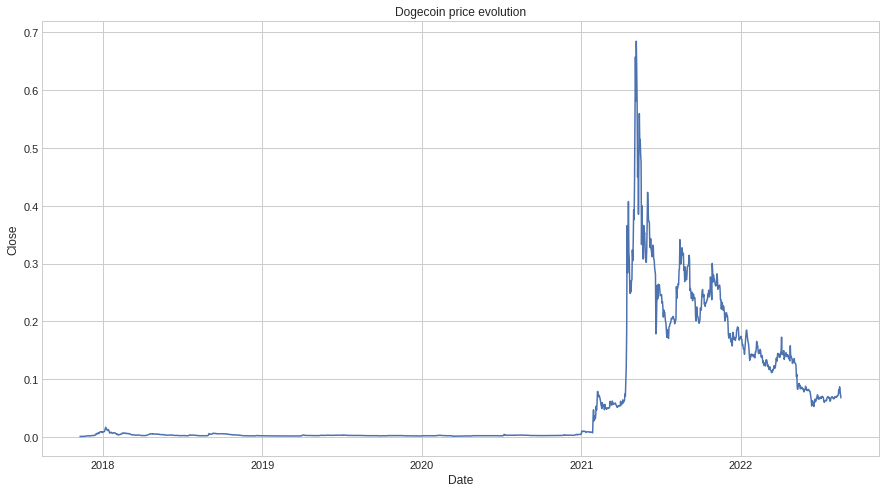

In [17]:
plt.figure(figsize=(15,8))
plt.title('Dogecoin price evolution')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(data['Close'])
plt.show()

In [18]:
pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 486 kB 22.0 MB/s 


In [20]:
from autots import AutoTS

In [23]:
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model.fit(data, date_col='Date', value_col='Close', id_col=None)

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
6/6 [==============================] - 13s 10ms/step - loss: 0.1918
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1886
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1875
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1881
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1869
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1868
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1873
Epoch 8/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1865
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1864
Epoch 10/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1868
Epoch 11/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1864
Epoch 12/50
6/6 [==============================] - 0s 13ms/step - loss: 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 35 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/5kr_yv1b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/h1utdnxu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95995', 'data', 'file=/tmp/tmp0ow7qcla/5kr_yv1b.json', 'init=/tmp/tmp0ow7qcla/h1utdnxu.json', 'output', 'file=/tmp/tmp_t68t0v9/prophet_model-20220820141740.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 36 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 36: GluonTS
Model Number: 37 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 38 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 38: MultivariateRegression
Model Number: 39 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 39: DatepartRegression
Model Number: 40 with model SeasonalNaive in generation 0 of 10
Model Number: 41 with model DatepartRegression in generation 0 of 10
Model Number: 42 with model UnobservedComponents in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model ETS in generation 0 of 10
Model Number: 45 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 45: VECM
Model Number: 46 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_0vdsobc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/q89bz517.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70428', 'data', 'file=/tmp/tmp0ow7qcla/_0vdsobc.json', 'init=/tmp/tmp0ow7qcla/q89bz517.json', 'output', 'file=/tmp/tmpusiyfuti/prophet_model-20220820141747.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:17:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 54 with model FBProphet in generation 0 of 10


14:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 55 with model SeasonalNaive in generation 0 of 10
Model Number: 56 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 57 with model NVAR in generation 0 of 10


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 58 with model Theta in generation 0 of 10
Model Number: 59 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 59: UnivariateRegression
Model Number: 60 with model ConstantNaive in generation 0 of 10
Model Number: 61 with model LastValueNaive in generation 0 of 10
Model Number: 62 with model AverageValueNaive in generation 0 of 10
Model Number: 63 with model GLS in generation 0 of 10
Model Number: 64 with model SeasonalNaive in generation 0 of 10
Model Number: 65 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 65: GLM
Model Number: 66 with model ETS in generation 0 of 10
Model Number: 67 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/6u6nxej2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/p3klud0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72687', 'data', 'file=/tmp/tmp0ow7qcla/6u6nxej2.json', 'init=/tmp/tmp0ow7qcla/p3klud0k.json', 'output', 'file=/tmp/tmpb1fwy8bt/prophet_model-20220820141752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 68 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 68: GluonTS
Model Number: 69 with model UnobservedComponents in generation 0 of 10
Model Number: 70 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 70: VAR
Model Number: 71 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 71: VECM
Model Number: 72 with model WindowRegression in generation 0 of 10
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 72: WindowRegression
Model Number: 73 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 73: DatepartRegression
Model Number: 74 with model UnivariateRegression in generat

/usr/local/lib/python3.7/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 81 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 81: ARDL
Model Number: 82 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 82: VAR
Model Number: 83 with model WindowRegression in generation 0 of 10
Model Number: 84 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 84: GLM
Model Number: 85 with model NVAR in generation 0 of 10
Model Number: 86 with model LastValueNaive in generation 0 of 10
Model Number: 87 with model LastValueNaive in generation 0 of 10
Model Number: 88 with model LastValueNaive in generation 0 of 10
Model Number: 89 with model LastValueNaive in generation 0 

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in true_divide
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


Model Number: 109 with model Theta in generation 0 of 10
Model Number: 110 with model ConstantNaive in generation 0 of 10
Model Number: 111 with model NVAR in generation 0 of 10
Model Number: 112 with model ConstantNaive in generation 0 of 10
Model Number: 113 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ip8ruewd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/mft3p26_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11034', 'data', 'file=/tmp/tmp0ow7qcla/ip8ruewd.json', 'init=/tmp/tmp0ow7qcla/mft3p26_.json', 'output', 'file=/tmp/tmp3jv_bbz0/prophet_model-20220820141759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 114 with model ConstantNaive in generation 0 of 10
Model Number: 115 with model DatepartRegression in generation 0 of 10
Epoch 1/50
3/3 [==============================] - 13s 23ms/step - loss: 100.4700
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 100.2497
Epoch 3/50
3/3 [==============================] - 0s 23ms/step - loss: 99.7127
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 99.1950
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 99.7238
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 99.6041
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 99.2944
Epoch 8/50
3/3 [==============================] - 0s 20ms/step - loss: 99.7065
Epoch 9/50
3/3 [==============================] - 0s 21ms/step - loss: 98.6541
Epoch 10/50
3/3 [==============================] - 0s 19ms/step - loss: 99.6878
Epoch 11/50
3/3 [==============================] - 0s 18ms/step - loss:

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/2rhjj0vi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ar6o135d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71978', 'data', 'file=/tmp/tmp0ow7qcla/2rhjj0vi.json', 'init=/tmp/tmp0ow7qcla/ar6o135d.json', 'output', 'file=/tmp/tmp4aks6ray/prophet_model-20220820141828.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:18:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 116 with model FBProphet in generation 0 of 10


14:18:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 117 with model ETS in generation 0 of 10
Model Number: 118 with model ConstantNaive in generation 0 of 10
Model Number: 119 with model UnivariateMotif in generation 0 of 10
Model Number: 120 with model ConstantNaive in generation 0 of 10
Model Number: 121 with model SeasonalNaive in generation 0 of 10
Model Number: 122 with model SeasonalNaive in generation 0 of 10
Model Number: 123 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 123: VAR
Model Number: 124 with model GLS in generation 0 of 10
Model Number: 125 with model WindowRegression in generation 0 of 10
Epoch 1/50
12/12 [==============================] - 11s 19ms/step - loss: nan
Epoch 2/50
12/12 [==============================] - 0s 10ms/step - loss: nan
Epoch 3/50
12/12 [==============================] - 0s 12ms/step - loss: nan
Epoch 4/50
12/12 [==============================] - 0s 10ms/step - loss: nan
Epoch 5/50
12/12 [==============================

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be rai

Model Number: 137 with model NVAR in generation 0 of 10
Model Number: 138 with model SeasonalNaive in generation 0 of 10
Model Number: 139 with model LastValueNaive in generation 0 of 10
Model Number: 140 with model MultivariateMotif in generation 0 of 10
Model Number: 141 with model ConstantNaive in generation 0 of 10
Model Number: 142 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 143 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 143: ARDL
Model Number: 144 with model DatepartRegression in generation 0 of 10
Model Number: 145 with model NVAR in generation 0 of 10
Model Number: 146 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only g

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 154 with model FBProphet in generation 0 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/3i9hhap2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/67s6lmj9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82477', 'data', 'file=/tmp/tmp0ow7qcla/3i9hhap2.json', 'init=/tmp/tmp0ow7qcla/67s6lmj9.json', 'output', 'file=/tmp/tmp2aqlv4o1/prophet_model-20220820141901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 155 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 155: GluonTS
Model Number: 156 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 156: VAR
Model Number: 157 with model MultivariateMotif in generation 0 of 10
Model Number: 158 with model GLS in generation 0 of 10
Model Number: 159 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 159: GLM
Model Number: 160 with model LastValueNaive in generation 0 of 10
Model Number: 161 with model MultivariateMotif in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 162 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 162: VAR
Model Number: 163 with model LastValueNaive in generation 0 of 10
Model Number: 164 with model NVAR in generation 0 of 10
Model Number: 165 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 165: GluonTS
Model Number: 166 with model MultivariateMotif in generation 0 of 10
Model Number: 167 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 167: ARDL
Model Number: 168 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 168: SectionalMotif
Model Number: 169 with model AverageValueNaive in generation 0 of 10
New Generation: 1 of 10
Model Number: 170 with mod

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/o2diumnf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/int2qd7i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11551', 'data', 'file=/tmp/tmp0ow7qcla/o2diumnf.json', 'init=/tmp/tmp0ow7qcla/int2qd7i.json', 'output', 'file=/tmp/tmp_wfi9pmg/prophet_model-20220820141930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yea

Model Number: 176 with model FBProphet in generation 1 of 10
Model Number: 177 with model NVAR in generation 1 of 10
Model Number: 178 with model UnobservedComponents in generation 1 of 10
Model Number: 179 with model Theta in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/br9elg19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/likptbk5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70278', 'data', 'file=/tmp/tmp0ow7qcla/br9elg19.json', 'init=/tmp/tmp0ow7qcla/likptbk5.json', 'output', 'file=/tmp/tmpyccluseg/prophet_model-20220820141936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 180 with model FBProphet in generation 1 of 10


14:19:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 181 with model LastValueNaive in generation 1 of 10
Model Number: 182 with model LastValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 182: LastValueNaive
Model Number: 183 with model UnivariateMotif in generation 1 of 10
Model Number: 184 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/vdd2y374.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/2n4zqwra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76475', 'data', 'file=/tmp/tmp0ow7qcla/vdd2y374.json', 'init=/tmp/tmp0ow7qcla/2n4zqwra.json', 'output', 'file=/tmp/tmpxu8hsvef/prophet_model-20220820141939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 185 with model LastValueNaive in generation 1 of 10
Model Number: 186 with model UnobservedComponents in generation 1 of 10
Model Number: 187 with model Theta in generation 1 of 10
Model Number: 188 with model UnivariateMotif in generation 1 of 10
Model Number: 189 with model MultivariateMotif in generation 1 of 10
Model Number: 190 with model GLS in generation 1 of 10
Model Number: 191 with model NVAR in generation 1 of 10
Model Number: 192 with model FBProphet in generation 1 of 10
Template Eval Error: ValueError('Dataframe has less than 2 non-NaN rows.') in model 192: FBProphet
Model Number: 193 with model DatepartRegression in generation 1 of 10
Model Number: 194 with model NVAR in generation 1 of 10
Model Number: 195 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 195: UnivariateRegression
Model Number: 196 with model Theta in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribut

Model Number: 197 with model FBProphet in generation 1 of 10


14:19:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 198 with model SectionalMotif in generation 1 of 10
Model Number: 199 with model ETS in generation 1 of 10
Model Number: 200 with model NVAR in generation 1 of 10
Model Number: 201 with model MultivariateMotif in generation 1 of 10
Model Number: 202 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 202: DatepartRegression
Model Number: 203 with model WindowRegression in generation 1 of 10
Model Number: 204 with model MultivariateMotif in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 205 with model ETS in generation 1 of 10
Model Number: 206 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/gecsxk6e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/29hsjsme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78148', 'data', 'file=/tmp/tmp0ow7qcla/gecsxk6e.json', 'init=/tmp/tmp0ow7qcla/29hsjsme.json', 'output', 'file=/tmp/tmp2rl_xvuo/prophet_model-20220820141951.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 207 with model UnivariateMotif in generation 1 of 10
Model Number: 208 with model SectionalMotif in generation 1 of 10
Model Number: 209 with model SectionalMotif in generation 1 of 10
Model Number: 210 with model MultivariateRegression in generation 1 of 10
Model Number: 211 with model MultivariateRegression in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 211: MultivariateRegression
Model Number: 212 with model MultivariateMotif in generation 1 of 10
Model Number: 213 with model LastValueNaive in generation 1 of 10
Model Number: 214 with model FBProphet in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 214: FBProphet
Model Number: 215 with model GLS in generation 1 of 10
Model Number: 216 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/nuinpf61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/4o2xf3l_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38694', 'data', 'file=/tmp/tmp0ow7qcla/nuinpf61.json', 'init=/tmp/tmp0ow7qcla/4o2xf3l_.json', 'output', 'file=/tmp/tmpp6n5ounv/prophet_model-20220820141955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 217 with model MultivariateMotif in generation 1 of 10
Model Number: 218 with model NVAR in generation 1 of 10
Model Number: 219 with model ETS in generation 1 of 10
Model Number: 220 with model AverageValueNaive in generation 1 of 10
Model Number: 221 with model LastValueNaive in generation 1 of 10
Model Number: 222 with model SectionalMotif in generation 1 of 10
Model Number: 223 with model SeasonalNaive in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 224 with model GLS in generation 1 of 10
Model Number: 225 with model SeasonalNaive in generation 1 of 10
Model Number: 226 with model DatepartRegression in generation 1 of 10
Model Number: 227 with model SectionalMotif in generation 1 of 10
Model Number: 228 with model GLS in generation 1 of 10
Model Number: 229 with model SectionalMotif in generation 1 of 10
Model Number: 230 with model UnivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 230: UnivariateMotif
Model Number: 231 with model NVAR in generation 1 of 10
Model Number: 232 with model NVAR in generation 1 of 10
Model Number: 233 with model ETS in generation 1 of 10
Model Number: 234 with model LastValueNaive in generation 1 of 10
Model Number: 235 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 235: NVAR
Model Number: 236 with model AverageValueNaive in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 237 with model AverageValueNaive in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/u2mfsqs3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/5bjv2uy8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=665', 'data', 'file=/tmp/tmp0ow7qcla/u2mfsqs3.json', 'init=/tmp/tmp0ow7qcla/5bjv2uy8.json', 'output', 'file=/tmp/tmpp4ofmso6/prophet_model-20220820142000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:00 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 238 with model FBProphet in generation 1 of 10


INFO:cmdstanpy:Chain [1] start processing
14:20:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ziv8qzyo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/5uzln0iu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97945', 'data', 'file=/tmp/tmp0ow7qcla/ziv8qzyo.json', 'init=/tmp/tmp0ow7qcla/5uzln0iu.json', 'output', 'file=/tmp/tmpsjte8jl_/prophet_model-20220820142004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 239 with model FBProphet in generation 1 of 10


14:20:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 240 with model MultivariateRegression in generation 1 of 10
Model Number: 241 with model AverageValueNaive in generation 1 of 10
Model Number: 242 with model ETS in generation 1 of 10
Model Number: 243 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/t_famp2c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/k44n4ihp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67610', 'data', 'file=/tmp/tmp0ow7qcla/t_famp2c.json', 'init=/tmp/tmp0ow7qcla/k44n4ihp.json', 'output', 'file=/tmp/tmpln1ot4ex/prophet_model-20220820142008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 244 with model NVAR in generation 1 of 10
Model Number: 245 with model ETS in generation 1 of 10
Model Number: 246 with model AverageValueNaive in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/xqtulg4t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/lb9uzwwi.json


Model Number: 247 with model UnivariateMotif in generation 1 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 247: UnivariateMotif
Model Number: 248 with model FBProphet in generation 1 of 10


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48383', 'data', 'file=/tmp/tmp0ow7qcla/xqtulg4t.json', 'init=/tmp/tmp0ow7qcla/lb9uzwwi.json', 'output', 'file=/tmp/tmpyk6pz2zf/prophet_model-20220820142012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 249 with model SeasonalNaive in generation 1 of 10
Model Number: 250 with model MultivariateMotif in generation 1 of 10
Model Number: 251 with model LastValueNaive in generation 1 of 10
Model Number: 252 with model NVAR in generation 1 of 10
Model Number: 253 with model SectionalMotif in generation 1 of 10
Model Number: 254 with model ConstantNaive in generation 1 of 10
Model Number: 255 with model MultivariateMotif in generation 1 of 10
Model Number: 256 with model UnivariateRegression in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 256: UnivariateRegression
Model Number: 257 with model AverageValueNaive in generation 1 of 10
Model Number: 258 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 258: UnobservedComponents
Model Number: 259 with model UnivariateMotif in generation 1 of 10
Model Number: 260 with model Theta in 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))



Model Number: 264 with model Theta in generation 1 of 10
Model Number: 265 with model UnobservedComponents in generation 1 of 10
Model Number: 266 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 267 with model SectionalMotif in generation 1 of 10
Model Number: 268 with model SeasonalNaive in generation 1 of 10
Model Number: 269 with model ConstantNaive in generation 1 of 10
Model Number: 270 with model UnobservedComponents in generation 1 of 10
Model Number: 271 with model NVAR in generation 1 of 10
Model Number: 272 with model UnivariateMotif in generation 1 of 10
Model Number: 273 with model AverageValueNaive in generation 1 of 10
Model Number: 274 with model MultivariateMotif in generation 1 of 10
Model Number: 275 with model NVAR in generation 1

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/q3a1p9l4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/wvg3cia4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8640', 'data', 'file=/tmp/tmp0ow7qcla/q3a1p9l4.json', 'init=/tmp/tmp0ow7qcla/wvg3cia4.json', 'output', 'file=/tmp/tmpe3doo9o0/prophet_model-20220820142020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 288 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 288: SectionalMotif
Model Number: 289 with model GLS in generation 2 of 10
Model Number: 290 with model ETS in generation 2 of 10
Model Number: 291 with model UnobservedComponents in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 292 with model NVAR in generation 2 of 10
Model Number: 293 with model Theta in generation 2 of 10
Model Number: 294 with model Theta in generation 2 of 10
Model Number: 295 with model SeasonalNaive in generation 2 of 10
Model Number: 296 with model MultivariateMotif in generation 2 of 10
Model Number: 297 with model WindowRegression in generation 2 of 10
Model Number: 298 with model LastValueNaive in generation 2 of 10
Model Number: 299 with model WindowRegression in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 300 with model UnivariateMotif in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 301 with model UnivariateMotif in generation 2 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (1)') in model 301: UnivariateMotif
Model Number: 302 with model ETS in generation 2 of 10
Model Number: 303 with model LastValueNaive in generation 2 of 10
Model Number: 304 with model SeasonalNaive in generation 2 of 10
Model Number: 305 with model SectionalMotif in generation 2 of 10
Model Number: 306 with model ETS in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 307 with model UnivariateMotif in generation 2 of 10
Model Number: 308 with model MultivariateMotif in generation 2 of 10
Model Number: 309 with model AverageValueNaive in generation 2 of 10
Model Number: 310 with model GLS in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 311 with model SectionalMotif in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/m2z78y_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/9756yex3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38207', 'data', 'file=/tmp/tmp0ow7qcla/m2z78y_3.json', 'init=/tmp/tmp0ow7qcla/9756yex3.json', 'output', 'file=/tmp/tmpjgcyt42p/prophet_model-20220820142029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 312 with model FBProphet in generation 2 of 10


14:20:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 313 with model LastValueNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 314 with model FBProphet in generation 2 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/7shv5y3u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/47dj8ahr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74922', 'data', 'file=/tmp/tmp0ow7qcla/7shv5y3u.json', 'init=/tmp/tmp0ow7qcla/47dj8ahr.json', 'output', 'file=/tmp/tmp2iy2wr_f/prophet_model-20220820142032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 315 with model ETS in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 316 with model FBProphet in generation 2 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/x_reeud8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/5j2a5_vk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54271', 'data', 'file=/tmp/tmp0ow7qcla/x_reeud8.json', 'init=/tmp/tmp0ow7qcla/5j2a5_vk.json', 'output', 'file=/tmp/tmpfc_fbscw/prophet_model-20220820142035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 317 with model MultivariateMotif in generation 2 of 10
Model Number: 318 with model UnivariateMotif in generation 2 of 10
Model Number: 319 with model SeasonalNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 320 with model SectionalMotif in generation 2 of 10
Model Number: 321 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 321: SectionalMotif
Model Number: 322 with model SeasonalNaive in generation 2 of 10
Model Number: 323 with model ETS in generation 2 of 10
Model Number: 324 with model SeasonalNaive in generation 2 of 10
Model Number: 325 with model UnivariateRegression in generation 2 of 10
Model Number: 326 with model SectionalMotif in generation 2 of 10
Model Number: 327 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 327: NVAR
Model Number: 328 with model SectionalMotif in generation 2 of 10
Model Number: 329 with model ETS in generation 2 of 10
Model Number: 330 with model Theta in generation 2 of 10
Model Number: 331 with model GLM in generation 2 of 10
Model Number: 332 with model LastValueNaive in gene

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/299p3c87.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/6go56u4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87244', 'data', 'file=/tmp/tmp0ow7qcla/299p3c87.json', 'init=/tmp/tmp0ow7qcla/6go56u4u.json', 'output', 'file=/tmp/tmpmm5b5vop/prophet_model-20220820142041.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:20:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 338 with model UnobservedComponents in generation 2 of 10
Model Number: 339 with model LastValueNaive in generation 2 of 10
Model Number: 340 with model SeasonalNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 341 with model MultivariateRegression in generation 2 of 10
Model Number: 342 with model MultivariateRegression in generation 2 of 10
Model Number: 343 with model SectionalMotif in generation 2 of 10
Model Number: 344 with model ETS in generation 2 of 10
Model Number: 345 with model SectionalMotif in generation 2 of 10
Model Number: 346 with model AverageValueNaive in generation 2 of 10
Model Number: 347 with model AverageValueNaive in generation 2 of 10
Model Number: 348 with model FBProphet in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/7oz47oyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_ctemae2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54108', 'data', 'file=/tmp/tmp0ow7qcla/7oz47oyd.json', 'init=/tmp/tmp0ow7qcla/_ctemae2.json', 'output', 'file=/tmp/tmpc_ors0wc/prophet_model-20220820142054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yea

Model Number: 349 with model UnivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 349: UnivariateRegression
Model Number: 350 with model FBProphet in generation 2 of 10


14:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 351 with model ConstantNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 351: ConstantNaive
Model Number: 352 with model DatepartRegression in generation 2 of 10
Epoch 1/50
6/6 [==============================] - 4s 7ms/step - loss: 510.7368
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 510.6964
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 510.6649
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 510.6418
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 510.6203
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 510.6003
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 510.5834
Epoch 8/50
6/6 [==============================] - 0s 13ms/step - loss: 510.5691
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 510.5557
Epoch 10/50
6/6 [==============================] - 

Template Eval Error: ValueError('Must pass 2-d input. shape=(10, 10, 4)') in model 352: DatepartRegression
Model Number: 353 with model WindowRegression in generation 2 of 10
Model Number: 354 with model DatepartRegression in generation 2 of 10
Model Number: 355 with model ConstantNaive in generation 2 of 10
Model Number: 356 with model Theta in generation 2 of 10
Model Number: 357 with model Theta in generation 2 of 10
Model Number: 358 with model UnobservedComponents in generation 2 of 10
Model Number: 359 with model MultivariateRegression in generation 2 of 10
Model Number: 360 with model GLS in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/20fbkq4f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_kb1xl5m.json
DEBUG:cmdstanpy:idx 0


Model Number: 361 with model FBProphet in generation 2 of 10


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47200', 'data', 'file=/tmp/tmp0ow7qcla/20fbkq4f.json', 'init=/tmp/tmp0ow7qcla/_kb1xl5m.json', 'output', 'file=/tmp/tmp3t7zax00/prophet_model-20220820142113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 362 with model NVAR in generation 2 of 10
Model Number: 363 with model LastValueNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 364 with model DatepartRegression in generation 2 of 10
Model Number: 365 with model NVAR in generation 2 of 10
Model Number: 366 with model UnivariateRegression in generation 2 of 10
Model Number: 367 with model ConstantNaive in generation 2 of 10
Model Number: 368 with model ConstantNaive in generation 2 of 10
Model Number: 369 with model AverageValueNaive in generation 2 of 10
Model Number: 370 with model NVAR in generation 2 of 10
Model Number: 371 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 371: MultivariateRegression
Model Number: 372 with model AverageValueNaive in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 373 with model FBProphet in generation 2 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/zlv8kscq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_sr_v4gi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79190', 'data', 'file=/tmp/tmp0ow7qcla/zlv8kscq.json', 'init=/tmp/tmp0ow7qcla/_sr_v4gi.json', 'output', 'file=/tmp/tmp08y0fgog/prophet_model-20220820142118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 374 with model LastValueNaive in generation 2 of 10
Model Number: 375 with model MultivariateMotif in generation 2 of 10
Model Number: 376 with model MultivariateMotif in generation 2 of 10
Model Number: 377 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 378 with model ConstantNaive in generation 2 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/79jcdkfq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ltrcy578.json


Model Number: 379 with model FBProphet in generation 2 of 10


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72471', 'data', 'file=/tmp/tmp0ow7qcla/79jcdkfq.json', 'init=/tmp/tmp0ow7qcla/ltrcy578.json', 'output', 'file=/tmp/tmp7n28ero6/prophet_model-20220820142122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 380 with model UnivariateMotif in generation 2 of 10
Model Number: 381 with model UnobservedComponents in generation 2 of 10
Model Number: 382 with model UnobservedComponents in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 383 with model UnobservedComponents in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/xctpgk2c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/6bvc_v5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35722', 'data', 'file=/tmp/tmp0ow7qcla/xctpgk2c.json', 'init=/tmp/tmp0ow7qcla/6bvc_v5q.json', 'output', 'file=/tmp/tmpp5m21nyf/prophet_model-20220820142130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 384 with model FBProphet in generation 2 of 10


14:21:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 385 with model GLS in generation 2 of 10
Model Number: 386 with model Theta in generation 2 of 10
Model Number: 387 with model UnivariateMotif in generation 2 of 10
Model Number: 388 with model MultivariateMotif in generation 2 of 10
Model Number: 389 with model NVAR in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


New Generation: 3 of 10
Model Number: 390 with model MultivariateMotif in generation 3 of 10
Model Number: 391 with model LastValueNaive in generation 3 of 10
Model Number: 392 with model FBProphet in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 392: FBProphet
Model Number: 393 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 393: ConstantNaive
Model Number: 394 with model LastValueNaive in generation 3 of 10
Model Number: 395 with model LastValueNaive in generation 3 of 10
Model Number: 396 with model LastValueNaive in generation 3 of 10
Model Number: 397 with model SeasonalNaive in generation 3 of 10
Model Number: 398 with model SeasonalNaive in generation 3 of 10
Model Number: 399 with model NVAR in generation 3 of 10
Model Number: 400 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_nof1akw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/3obx33a7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6940', 'data', 'file=/tmp/tmp0ow7qcla/_nof1akw.json', 'init=/tmp/tmp0ow7qcla/3obx33a7.json', 'output', 'file=/tmp/tmpv7xawt_i/prophet_model-20220820142136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 401 with model ETS in generation 3 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 402 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 403 with model NVAR in generation 3 of 10
Model Number: 404 with model SectionalMotif in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 404: SectionalMotif
Model Number: 405 with model MultivariateMotif in generation 3 of 10
Model Number: 406 with model MultivariateMotif in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 407 with model NVAR in generation 3 of 10
Model Number: 408 with model DatepartRegression in generation 3 of 10
Model Number: 409 with model Theta in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 410 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 410: UnobservedComponents
Model Number: 411 with model SeasonalNaive in generation 3 of 10
Model Number: 412 with model UnobservedComponents in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Template Eval Error: LinAlgError('Singular matrix') in model 412: UnobservedComponents
Model Number: 413 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 413: WindowRegression
Model Number: 414 with model NVAR in generation 3 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 414: NVAR
Model Number: 415 with model NVAR in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/9zdoc0fk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/sv3_hu3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47013', 'data', 'file=/tmp/tmp0ow7qcla/9zdoc0fk.json', 'init=/tmp/tmp0ow7qcla/sv3_hu3x.json', 'output', 'file=/tmp/tmps6w0vo66/prophet_model-20220820142142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 416 with model FBProphet in generation 3 of 10


14:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 417 with model NVAR in generation 3 of 10
Model Number: 418 with model SeasonalNaive in generation 3 of 10
Model Number: 419 with model UnivariateMotif in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 420 with model FBProphet in generation 3 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/517v5t0u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/aq1j6vbg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33279', 'data', 'file=/tmp/tmp0ow7qcla/517v5t0u.json', 'init=/tmp/tmp0ow7qcla/aq1j6vbg.json', 'output', 'file=/tmp/tmpf3a465qp/prophet_model-20220820142147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 421 with model ConstantNaive in generation 3 of 10
Model Number: 422 with model GLS in generation 3 of 10
Model Number: 423 with model ETS in generation 3 of 10
Model Number: 424 with model ConstantNaive in generation 3 of 10
Model Number: 425 with model ConstantNaive in generation 3 of 10
Model Number: 426 with model Theta in generation 3 of 10
Model Number: 427 with model Theta in generation 3 of 10
Model Number: 428 with model AverageValueNaive in generation 3 of 10
Model Number: 429 with model SectionalMotif in generation 3 of 10
Model Number: 430 with model SeasonalNaive in generation 3 of 10
Model Number: 431 with model LastValueNaive in generation 3 of 10
Model Number: 432 with model ETS in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 433 with model NVAR in generation 3 of 10
Model Number: 434 with model UnobservedComponents in generation 3 of 10
Model Number: 435 with model Theta in generation 3 of 10
Model Number: 436 with model MultivariateMotif in generation 3 of 10
Model Number: 437 with model UnivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 437: UnivariateMotif
Model Number: 438 with model UnobservedComponents in generation 3 of 10
Model Number: 439 with model ETS in generation 3 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 440 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 441 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/c09jbz4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/t99fxqmv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11663', 'data', 'file=/tmp/tmp0ow7qcla/c09jbz4x.json', 'init=/tmp/tmp0ow7qcla/t99fxqmv.json', 'output', 'file=/tmp/tmpda4u5a4m/prophet_model-20220820142200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 442 with model MultivariateMotif in generation 3 of 10
Model Number: 443 with model UnivariateMotif in generation 3 of 10
Model Number: 444 with model LastValueNaive in generation 3 of 10
Model Number: 445 with model LastValueNaive in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_lo

Model Number: 446 with model UnivariateMotif in generation 3 of 10
Model Number: 447 with model UnivariateMotif in generation 3 of 10
Model Number: 448 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/cuid_f_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/fse1ohkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41801', 'data', 'file=/tmp/tmp0ow7qcla/cuid_f_p.json', 'init=/tmp/tmp0ow7qcla/fse1ohkj.json', 'output', 'file=/tmp/tmp7ryupbr4/prophet_model-20220820142204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 449 with model DatepartRegression in generation 3 of 10
Model Number: 450 with model UnivariateMotif in generation 3 of 10
Model Number: 451 with model GLS in generation 3 of 10
Model Number: 452 with model LastValueNaive in generation 3 of 10
Model Number: 453 with model UnivariateMotif in generation 3 of 10
Model Number: 454 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 454: UnivariateRegression
Model Number: 455 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 456 with model AverageValueNaive in generation 3 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 457 with model LastValueNaive in generation 3 of 10
Model Number: 458 with model UnobservedComponents in generation 3 of 10
Model Number: 459 with model MultivariateMotif in generation 3 of 10
Model Number: 460 with model NVAR in generation 3 of 10
Model Number: 461 with model WindowRegression in generation 3 of 10
Model Number: 462 with model MultivariateMotif in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 463 with model SectionalMotif in generation 3 of 10
Model Number: 464 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 464: UnivariateRegression
Model Number: 465 with model NVAR in generation 3 of 10
Model Number: 466 with model GLS in generation 3 of 10
Model Number: 467 with model GLM in generation 3 of 10
Model Number: 468 with model LastValueNaive in generation 3 of 10
Model Number: 469 with model UnivariateMotif in generation 3 of 10
Model Number: 470 with model DatepartRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 471 with model SectionalMotif in generation 3 of 10
Model Number: 472 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 473 with model ETS in generation 3 of 10
Model Number: 474 with model SectionalMotif in generation 3 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 474: SectionalMotif
Model Number: 475 with model ETS in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 476 with model MultivariateRegression in generation 3 of 10
Model Number: 477 with model NVAR in generation 3 of 10
Model Number: 478 with model MultivariateMotif in generation 3 of 10
Model Number: 479 with model UnobservedComponents in generation 3 of 10
Model Number: 480 with model LastValueNaive in generation 3 of 10
Model Number: 481 with model SectionalMotif in generation 3 of 10
Model Number: 482 with model SeasonalNaive in generation 3 of 10
Model Number: 483 with model ETS in generation 3 of 10
Model Number: 484 with model LastValueNaive in generation 3 of 10
Model Number: 485 with model SectionalMotif in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/v2kvn65y.json


Model Number: 486 with model FBProphet in generation 3 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/zmg52huz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=935', 'data', 'file=/tmp/tmp0ow7qcla/v2kvn65y.json', 'init=/tmp/tmp0ow7qcla/zmg52huz.json', 'output', 'file=/tmp/tmp3ms2qsln/prophet_model-20220820142216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/rbdpxmke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/rsl2v91t.json
DE

Model Number: 487 with model FBProphet in generation 3 of 10
Model Number: 488 with model Theta in generation 3 of 10
Model Number: 489 with model UnivariateMotif in generation 3 of 10
Model Number: 490 with model MultivariateRegression in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 490: MultivariateRegression
Model Number: 491 with model NVAR in generation 3 of 10
Model Number: 492 with model ETS in generation 3 of 10
Model Number: 493 with model SectionalMotif in generation 3 of 10
Model Number: 494 with model FBProphet in generation 3 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 494: FBProphet
Model Number: 495 with model SectionalMotif in generation 3 of 10
Model Number: 496 with model MultivariateMotif in generation 3 of 10
Model Number: 497 with model Theta in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:1187: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 498 with model UnivariateRegression in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 498: UnivariateRegression
Model Number: 499 with model WindowRegression in generation 3 of 10
New Generation: 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/lmboarkp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/n7rqenc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67312', 'data', 'file=/tmp/tmp0ow7qcla/lmboarkp.json', 'init=/tmp/tmp0ow7qcla/n7rqenc2.json', 'output', 'file=/tmp/tmp2hiqsm_s/prophet_model-20220820142221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 500 with model FBProphet in generation 4 of 10
Model Number: 501 with model MultivariateRegression in generation 4 of 10
Model Number: 502 with model SeasonalNaive in generation 4 of 10
Model Number: 503 with model ETS in generation 4 of 10
Model Number: 504 with model UnobservedComponents in generation 4 of 10
Model Number: 505 with model SeasonalNaive in generation 4 of 10
Model Number: 506 with model MultivariateRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 507 with model MultivariateMotif in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/autots/models/basics.py:1111: RuntimeWarning: Mean of empty slice
  forecast = np.nanmean(results, axis=0)
/usr/local/lib/python3.7/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 507: MultivariateMotif
Model Number: 508 with model UnivariateMotif in generation 4 of 10
Model Number: 509 with model FBProphet in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 509: FBProphet
Model Number: 510 with model SectionalMotif in generation 4 of 10
Model Number: 511 with model FBProphet in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 511: FBProphet
Model Number: 512 with model NVAR in generation 4 of 10
Model Number: 513 with model GLS in generation 4 of 10
Model Number: 514 with model Theta in generation 4 of 10
Model Number: 515 with model NVAR in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/7j9lng7p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/v5d7ax0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37995', 'data', 'file=/tmp/tmp0ow7qcla/7j9lng7p.json', 'init=/tmp/tmp0ow7qcla/v5d7ax0o.json', 'output', 'file=/tmp/tmpwdcg2_6l/prophet_model-20220820142226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:26 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 516 with model FBProphet in generation 4 of 10


INFO:cmdstanpy:Chain [1] start processing
14:22:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 517 with model GLM in generation 4 of 10
Model Number: 518 with model ETS in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 518: ETS
Model Number: 519 with model MultivariateRegression in generation 4 of 10
Model Number: 520 with model UnivariateRegression in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/karh44uy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/c7c7t9ti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71027', 'data', 'file=/tmp/tmp0ow7qcla/karh44uy.json', 'init=/tmp/tmp0ow7qcla/c7c7t9ti.json', 'output', 'file=/tmp/tmpo2gh67_5/prophet_model-20220820142228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:28 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 521 with model FBProphet in generation 4 of 10


INFO:cmdstanpy:Chain [1] start processing
14:22:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 522 with model UnivariateMotif in generation 4 of 10
Model Number: 523 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 523: WindowRegression
Model Number: 524 with model LastValueNaive in generation 4 of 10
Model Number: 525 with model AverageValueNaive in generation 4 of 10
Model Number: 526 with model ETS in generation 4 of 10
Model Number: 527 with model UnivariateMotif in generation 4 of 10
Model Number: 528 with model SeasonalNaive in generation 4 of 10
Model Number: 529 with model SectionalMotif in generation 4 of 10
Model Number: 530 with model MultivariateMotif in generation 4 of 10
Model Number: 531 with model Theta in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 532 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 532: MultivariateRegression
Model Number: 533 with model LastValueNaive in generation 4 of 10
Model Number: 534 with model GLS in generation 4 of 10
Model Number: 535 with model ConstantNaive in generation 4 of 10
Model Number: 536 with model Theta in generation 4 of 10
Model Number: 537 with model NVAR in generation 4 of 10
Model Number: 538 with model MultivariateMotif in generation 4 of 10
Model Number: 539 with model SectionalMotif in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 540 with model FBProphet in generation 4 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/2p7aoijw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/y17__ixk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62351', 'data', 'file=/tmp/tmp0ow7qcla/2p7aoijw.json', 'init=/tmp/tmp0ow7qcla/y17__ixk.json', 'output', 'file=/tmp/tmpbrkg9lwb/prophet_model-20220820142232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 541 with model UnobservedComponents in generation 4 of 10
Model Number: 542 with model DatepartRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 543 with model SectionalMotif in generation 4 of 10
Model Number: 544 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 544: UnobservedComponents
Model Number: 545 with model ETS in generation 4 of 10
Model Number: 546 with model ETS in generation 4 of 10
Model Number: 547 with model AverageValueNaive in generation 4 of 10
Model Number: 548 with model NVAR in generation 4 of 10
Model Number: 549 with model AverageValueNaive in generation 4 of 10
Model Number: 550 with model ETS in generation 4 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 551 with model GLS in generation 4 of 10
Model Number: 552 with model SectionalMotif in generation 4 of 10
Model Number: 553 with model NVAR in generation 4 of 10
Model Number: 554 with model NVAR in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 555 with model FBProphet in generation 4 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/26eylgq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/j5hk6ksb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15847', 'data', 'file=/tmp/tmp0ow7qcla/26eylgq1.json', 'init=/tmp/tmp0ow7qcla/j5hk6ksb.json', 'output', 'file=/tmp/tmpnfiwekep/prophet_model-20220820142235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 556 with model WindowRegression in generation 4 of 10
Model Number: 557 with model UnivariateMotif in generation 4 of 10
Model Number: 558 with model AverageValueNaive in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: L

Model Number: 559 with model MultivariateMotif in generation 4 of 10
Model Number: 560 with model Theta in generation 4 of 10
Model Number: 561 with model UnivariateMotif in generation 4 of 10
Model Number: 562 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 562: LastValueNaive
Model Number: 563 with model UnobservedComponents in generation 4 of 10
Model Number: 564 with model UnobservedComponents in generation 4 of 10
Model Number: 565 with model ConstantNaive in generation 4 of 10
Model Number: 566 with model ETS in generation 4 of 10
Model Number: 567 with model GLS in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 567: GLS
Model Number: 568 with model MultivariateRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_r

Model Number: 569 with model SectionalMotif in generation 4 of 10
Model Number: 570 with model UnivariateMotif in generation 4 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/6i68oblg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/qb0lo2ss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30181', 'data', 'file=/tmp/tmp0ow7qcla/6i68oblg.json', 'init=/tmp/tmp0ow7qcla/qb0lo2ss.json', 'output', 'file=/tmp/tmp0kmhk3e5/prophet_model-20220820142239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 571 with model FBProphet in generation 4 of 10


14:22:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 572 with model LastValueNaive in generation 4 of 10
Model Number: 573 with model NVAR in generation 4 of 10
Model Number: 574 with model NVAR in generation 4 of 10
Model Number: 575 with model DatepartRegression in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 575: DatepartRegression
Model Number: 576 with model AverageValueNaive in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 577 with model FBProphet in generation 4 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/63u1uy8_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/e682jwda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15414', 'data', 'file=/tmp/tmp0ow7qcla/63u1uy8_.json', 'init=/tmp/tmp0ow7qcla/e682jwda.json', 'output', 'file=/tmp/tmpanclhhkx/prophet_model-20220820142241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 578 with model UnobservedComponents in generation 4 of 10
Template Eval Error: LinAlgError('Schur decomposition solver error.') in model 578: UnobservedComponents
Model Number: 579 with model UnobservedComponents in generation 4 of 10
Model Number: 580 with model UnivariateMotif in generation 4 of 10
Model Number: 581 with model MultivariateMotif in generation 4 of 10
Model Number: 582 with model Theta in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/acj8ppr0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/fx_ksfxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/p

Model Number: 583 with model FBProphet in generation 4 of 10


14:22:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 584 with model Theta in generation 4 of 10
Model Number: 585 with model MultivariateMotif in generation 4 of 10
Model Number: 586 with model Theta in generation 4 of 10
Model Number: 587 with model LastValueNaive in generation 4 of 10
Model Number: 588 with model SectionalMotif in generation 4 of 10
Model Number: 589 with model LastValueNaive in generation 4 of 10
Model Number: 590 with model WindowRegression in generation 4 of 10
Template Eval Error: LightGBMError('Check failed: label > 0 at /__w/1/s/python-package/compile/src/metric/regression_metric.hpp, line 268 .\n') in model 590: WindowRegression
Model Number: 591 with model UnobservedComponents in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 592 with model LastValueNaive in generation 4 of 10
Model Number: 593 with model UnivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 593: UnivariateRegression
Model Number: 594 with model SectionalMotif in generation 4 of 10
Model Number: 595 with model SeasonalNaive in generation 4 of 10
Model Number: 596 with model WindowRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_lo

Model Number: 597 with model UnivariateMotif in generation 4 of 10
Model Number: 598 with model LastValueNaive in generation 4 of 10
Model Number: 599 with model Theta in generation 4 of 10
Model Number: 600 with model MultivariateMotif in generation 4 of 10
Model Number: 601 with model MultivariateMotif in generation 4 of 10
Model Number: 602 with model DatepartRegression in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 602: DatepartRegression
Model Number: 603 with model ConstantNaive in generation 4 of 10
Model Number: 604 with model UnivariateMotif in generation 4 of 10
Model Number: 605 with model MultivariateMotif in generation 4 of 10
Model Number: 606 with model LastValueNaive in generation 4 of 10
Model Number: 607 with model MultivariateMotif in generation 4 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 607: MultivariateMotif
Model

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribut

Model Number: 609 with model LastValueNaive in generation 4 of 10
New Generation: 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 610 with model FBProphet in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_v3g_l59.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/958y0fg7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64401', 'data', 'file=/tmp/tmp0ow7qcla/_v3g_l59.json', 'init=/tmp/tmp0ow7qcla/958y0fg7.json', 'output', 'file=/tmp/tmp1sbf_7qd/prophet_model-20220820142252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 611 with model FBProphet in generation 5 of 10
Model Number: 612 with model SectionalMotif in generation 5 of 10
Model Number: 613 with model NVAR in generation 5 of 10
Model Number: 614 with model ConstantNaive in generation 5 of 10
Model Number: 615 with model Theta in generation 5 of 10
Model Number: 616 with model AverageValueNaive in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 617 with model SeasonalNaive in generation 5 of 10
Model Number: 618 with model NVAR in generation 5 of 10
Model Number: 619 with model SeasonalNaive in generation 5 of 10
Model Number: 620 with model NVAR in generation 5 of 10
Model Number: 621 with model FBProphet in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/wwgt5hr6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/s1gbmaky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/p

Model Number: 622 with model ETS in generation 5 of 10
ETS failed on Close with ValueError('operands could not be broadcast together with shapes (12,) (28,) ')
Model Number: 623 with model UnobservedComponents in generation 5 of 10
Model Number: 624 with model UnobservedComponents in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 625 with model SeasonalNaive in generation 5 of 10
Model Number: 626 with model NVAR in generation 5 of 10
Model Number: 627 with model UnivariateMotif in generation 5 of 10
Model Number: 628 with model LastValueNaive in generation 5 of 10
Model Number: 629 with model LastValueNaive in generation 5 of 10
Model Number: 630 with model UnobservedComponents in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 631 with model UnivariateMotif in generation 5 of 10
Model Number: 632 with model UnobservedComponents in generation 5 of 10
Model Number: 633 with model ConstantNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 633: ConstantNaive
Model Number: 634 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 634: MultivariateRegression
Model Number: 635 with model NVAR in generation 5 of 10
Model Number: 636 with model SectionalMotif in generation 5 of 10
Model Number: 637 with model MultivariateMotif in generation 5 of 10
Model Number: 638 with model GLS in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_lo

Model Number: 639 with model SectionalMotif in generation 5 of 10
Model Number: 640 with model DatepartRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 640: DatepartRegression
Model Number: 641 with model SectionalMotif in generation 5 of 10
Model Number: 642 with model Theta in generation 5 of 10
Model Number: 643 with model ETS in generation 5 of 10
Model Number: 644 with model ETS in generation 5 of 10
Model Number: 645 with model LastValueNaive in generation 5 of 10
Model Number: 646 with model Theta in generation 5 of 10
Model Number: 647 with model SectionalMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 647: SectionalMotif
Model Number: 648 with model SeasonalNaive in generation 5 of 10
Model Number: 649 with model Theta in generation 5 of 10
Model Number: 650 with model LastValueNaive in generation 5 of 10
Model Number: 651 with model WindowRegression in gene

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 652 with model MultivariateRegression in generation 5 of 10
Model Number: 653 with model NVAR in generation 5 of 10
Model Number: 654 with model UnivariateMotif in generation 5 of 10
Model Number: 655 with model SeasonalNaive in generation 5 of 10
Model Number: 656 with model ConstantNaive in generation 5 of 10
Model Number: 657 with model NVAR in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 657: NVAR
Model Number: 658 with model UnivariateMotif in generation 5 of 10
Model Number: 659 with model FBProphet in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ax9en4fk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/rnsz6hgc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19782', 'data', 'file=/tmp/tmp0ow7qcla/ax9en4fk.json', 'init=/tmp/tmp0ow7qcla/rnsz6hgc.json', 'output', 'file=/tmp/tmp7w6v0m6d/prophet_model-20220820142301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 660 with model GLS in generation 5 of 10
Model Number: 661 with model UnivariateMotif in generation 5 of 10
Model Number: 662 with model ConstantNaive in generation 5 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 662: ConstantNaive
Model Number: 663 with model Theta in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:1187: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 664 with model LastValueNaive in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/wr5y1pfc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/6mvvrmqw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92298', 'data', 'file=/tmp/tmp0ow7qcla/wr5y1pfc.json', 'init=/tmp/tmp0ow7qcla/6mvvrmqw.json', 'output', 'file=/tmp/tmpsz2isdlf/prophet_model-20220820142304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 665 with model FBProphet in generation 5 of 10


14:23:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 666 with model LastValueNaive in generation 5 of 10
Model Number: 667 with model AverageValueNaive in generation 5 of 10
Model Number: 668 with model NVAR in generation 5 of 10
Model Number: 669 with model UnivariateRegression in generation 5 of 10
Model Number: 670 with model UnivariateRegression in generation 5 of 10
Model Number: 671 with model UnobservedComponents in generation 5 of 10
Model Number: 672 with model UnivariateMotif in generation 5 of 10
Model Number: 673 with model NVAR in generation 5 of 10
Model Number: 674 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 675 with model SeasonalNaive in generation 5 of 10
Model Number: 676 with model ConstantNaive in generation 5 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 677 with model WindowRegression in generation 5 of 10
Model Number: 678 with model ETS in generation 5 of 10
Model Number: 679 with model SectionalMotif in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 680 with model ConstantNaive in generation 5 of 10
Model Number: 681 with model UnobservedComponents in generation 5 of 10
Model Number: 682 with model LastValueNaive in generation 5 of 10
Model Number: 683 with model GLM in generation 5 of 10
Model Number: 684 with model SeasonalNaive in generation 5 of 10
Model Number: 685 with model GLS in generation 5 of 10
Model Number: 686 with model AverageValueNaive in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 687 with model FBProphet in generation 5 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/z9ib9f9y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/crx8i7mx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75009', 'data', 'file=/tmp/tmp0ow7qcla/z9ib9f9y.json', 'init=/tmp/tmp0ow7qcla/crx8i7mx.json', 'output', 'file=/tmp/tmpo7wlzz78/prophet_model-20220820142310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 688 with model FBProphet in generation 5 of 10
Model Number: 689 with model NVAR in generation 5 of 10
Model Number: 690 with model UnobservedComponents in generation 5 of 10
Model Number: 691 with model AverageValueNaive in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribut

Model Number: 692 with model SectionalMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 692: SectionalMotif
Model Number: 693 with model UnivariateRegression in generation 5 of 10
Model Number: 694 with model NVAR in generation 5 of 10
SinTrend failed with ValueError('array must not contain infs or NaNs') for 2022-02-01 00:00:00 with 0
SinTrend failed with ValueError('array must not contain infs or NaNs') for 2022-02-02 00:00:00 with 0
SinTrend failed with ValueError('array must not contain infs or NaNs') for 2022-02-03 00:00:00 with 0
SinTrend failed with ValueError('array must not contain infs or NaNs') for 2022-02-04 00:00:00 with 0
SinTrend failed with ValueError('array must not contain infs or NaNs') for 2022-02-05 00:00:00 with 0
SinTrend failed with ValueError('array must not contain infs or NaNs') for 2022-02-06 00:00:00 with 0
SinTrend failed with ValueError('array must not contain infs or NaNs') for 2022-02-07 00:00

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 697 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 697: UnobservedComponents
New Generation: 6 of 10
Model Number: 698 with model LastValueNaive in generation 6 of 10
Model Number: 699 with model UnobservedComponents in generation 6 of 10
Model Number: 700 with model UnivariateRegression in generation 6 of 10
Model Number: 701 with model UnivariateMotif in generation 6 of 10
Model Number: 702 with model SectionalMotif in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: Degrees of freedom <= 0 for slice
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 702: SectionalMotif
Model Number: 703 with model SectionalMotif in generation 6 of 10
Model Number: 704 with model SectionalMotif in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


Model Number: 705 with model Theta in generation 6 of 10
Model Number: 706 with model DatepartRegression in generation 6 of 10
Model Number: 707 with model AverageValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 707: AverageValueNaive
Model Number: 708 with model UnobservedComponents in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 709 with model MultivariateMotif in generation 6 of 10
Model Number: 710 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 710: WindowRegression
Model Number: 711 with model AverageValueNaive in generation 6 of 10
Model Number: 712 with model UnivariateMotif in generation 6 of 10
Model Number: 713 with model SectionalMotif in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 714 with model FBProphet in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 714: FBProphet
Model Number: 715 with model NVAR in generation 6 of 10
Model Number: 716 with model GLS in generation 6 of 10
Model Number: 717 with model NVAR in generation 6 of 10
Model Number: 718 with model Theta in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribut

Model Number: 719 with model SeasonalNaive in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/552dx33j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/wmz2k91w.json


Model Number: 720 with model FBProphet in generation 6 of 10


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16871', 'data', 'file=/tmp/tmp0ow7qcla/552dx33j.json', 'init=/tmp/tmp0ow7qcla/wmz2k91w.json', 'output', 'file=/tmp/tmpao0lpexa/prophet_model-20220820142318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/klgkkesy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/sn49pupg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thre

Model Number: 721 with model FBProphet in generation 6 of 10


14:23:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 722 with model SectionalMotif in generation 6 of 10
Model Number: 723 with model SeasonalNaive in generation 6 of 10
Model Number: 724 with model WindowRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 725 with model UnobservedComponents in generation 6 of 10
Model Number: 726 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 727 with model UnivariateMotif in generation 6 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 728 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on 0 with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 729 with model UnivariateMotif in generation 6 of 10
Model Number: 730 with model SectionalMotif in generation 6 of 10
Model Number: 731 with model UnobservedComponents in generation 6 of 10
Model Number: 732 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 733 with model MultivariateMotif in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 734 with model FBProphet in generation 6 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_zcyh698.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/k8s6kk_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27742', 'data', 'file=/tmp/tmp0ow7qcla/_zcyh698.json', 'init=/tmp/tmp0ow7qcla/k8s6kk_u.json', 'output', 'file=/tmp/tmp_e8deblb/prophet_model-20220820142327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 735 with model SeasonalNaive in generation 6 of 10
Model Number: 736 with model SeasonalNaive in generation 6 of 10
Model Number: 737 with model UnivariateMotif in generation 6 of 10
Model Number: 738 with model ConstantNaive in generation 6 of 10
Model Number: 739 with model AverageValueNaive in generation 6 of 10
Model Number: 740 with model NVAR in generation 6 of 10
Model Number: 741 with model UnivariateMotif in generation 6 of 10
Model Number: 742 with model LastValueNaive in generation 6 of 10
Model Number: 743 with model UnobservedComponents in generation 6 of 10
Model Number: 744 with model FBProphet in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 745 with model SectionalMotif in generation 6 of 10
Model Number: 746 with model GLM in generation 6 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 746: GLM
Model Number: 747 with model UnivariateMotif in generation 6 of 10
Model Number: 748 with model UnivariateMotif in generation 6 of 10
Model Number: 749 with model FBProphet in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/508ivoth.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/hv6civwq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90270', 'data', 'file=/tmp/tmp0ow7qcla/508ivoth.json', 'init=/tmp/tmp0ow7qcla/hv6civwq.json', 'output', 'file=/tmp/tmpwaip4pkn/prophet_model-20220820142331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Model Number: 750 with model NVAR in generation 6 of 10
Model Number: 751 with model SectionalMotif in generation 6 of 10
Model Number: 752 with model ETS in generation 6 of 10
Model Number: 753 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 754 with model Theta in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 755 with model UnivariateMotif in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/0_mynnly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/t7y1bltx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82069', 'data', 'file=/tmp/tmp0ow7qcla/0_mynnly.json', 'init=/tmp/tmp0ow7qcla/t7y1bltx.json', 'output', 'file=/tmp/tmp4ytxp6gt/prophet_model-20220820142333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 756 with model FBProphet in generation 6 of 10


14:23:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 757 with model NVAR in generation 6 of 10
Model Number: 758 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 759 with model MultivariateMotif in generation 6 of 10
Model Number: 760 with model AverageValueNaive in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 761 with model FBProphet in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/6cctimqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/cgey2au9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52557', 'data', 'file=/tmp/tmp0ow7qcla/6cctimqa.json', 'init=/tmp/tmp0ow7qcla/cgey2au9.json', 'output', 'file=/tmp/tmpzxum6_zv/prophet_model-20220820142335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 762 with model ETS in generation 6 of 10
Model Number: 763 with model SeasonalNaive in generation 6 of 10
Model Number: 764 with model ConstantNaive in generation 6 of 10
Model Number: 765 with model UnivariateMotif in generation 6 of 10
Model Number: 766 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 767 with model SectionalMotif in generation 6 of 10
Model Number: 768 with model GLS in generation 6 of 10
Model Number: 769 with model UnivariateMotif in generation 6 of 10
Model Number: 770 with model DatepartRegression in generation 6 of 10
Model Number: 771 with model NVAR in generation 6 of 10
Model Number: 772 with model ConstantNaive in generation 6 of 10
Model Number: 773 with model NVAR in generation 6 of 10
Model Number: 774 wit

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 775 with model ETS in generation 6 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 776 with model AverageValueNaive in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/pqc2hy_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/f9e7prme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32923', 'data', 'file=/tmp/tmp0ow7qcla/pqc2hy_h.json', 'init=/tmp/tmp0ow7qcla/f9e7prme.json', 'output', 'file=/tmp/tmp_mg7ehu1/prophet_model-20220820142338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 777 with model FBProphet in generation 6 of 10


14:23:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 778 with model UnivariateRegression in generation 6 of 10
Model Number: 779 with model UnivariateRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_r

Model Number: 780 with model UnivariateMotif in generation 6 of 10
Model Number: 781 with model DatepartRegression in generation 6 of 10
Epoch 1/50
24/24 [==============================] - 9s 30ms/step - loss: nan
Epoch 2/50
24/24 [==============================] - 1s 31ms/step - loss: nan
Epoch 3/50
24/24 [==============================] - 1s 31ms/step - loss: nan
Epoch 4/50
24/24 [==============================] - 1s 31ms/step - loss: nan
Epoch 5/50
24/24 [==============================] - 1s 31ms/step - loss: nan
Epoch 6/50
24/24 [==============================] - 1s 31ms/step - loss: nan
Epoch 7/50
24/24 [==============================] - 1s 31ms/step - loss: nan
Epoch 8/50
24/24 [==============================] - 1s 32ms/step - loss: nan
Epoch 9/50
24/24 [==============================] - 1s 32ms/step - loss: nan
Epoch 10/50
24/24 [==============================] - 1s 32ms/step - loss: nan
Epoch 11/50
24/24 [==============================] - 1s 32ms/step - loss: nan
Epoch 12/50
24

Model Number: 782 with model MultivariateMotif in generation 6 of 10
Model Number: 783 with model SeasonalNaive in generation 6 of 10
Model Number: 784 with model LastValueNaive in generation 6 of 10
Model Number: 785 with model UnivariateMotif in generation 6 of 10
New Generation: 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ri_dfdvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/9p0syndq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10406', 'data', 'file=/tmp/tmp0ow7qcla/ri_dfdvr.json', 'init=/tmp/tmp0ow7qcla/9p0syndq.json', 'output', 'file=/tmp/tmple83y0z8/prophet_model-20220820142431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 786 with model FBProphet in generation 7 of 10


14:24:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 787 with model ETS in generation 7 of 10
Model Number: 788 with model Theta in generation 7 of 10
Model Number: 789 with model Theta in generation 7 of 10
Model Number: 790 with model LastValueNaive in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/1ab51kz2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/7jhayy6v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53795', 'data', 'file=/tmp/tmp0ow7qcla/1ab51kz2.json', 'init=/tmp/tmp0ow7qcla/7jhayy6v.json', 'output', 'file=/tmp/tmpt82illmm/prophet_model-20220820142434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 791 with model FBProphet in generation 7 of 10


14:24:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 792 with model LastValueNaive in generation 7 of 10
Model Number: 793 with model MultivariateMotif in generation 7 of 10
Model Number: 794 with model GLS in generation 7 of 10
Model Number: 795 with model ETS in generation 7 of 10
Model Number: 796 with model MultivariateMotif in generation 7 of 10
Model Number: 797 with model SeasonalNaive in generation 7 of 10
Model Number: 798 with model ETS in generation 7 of 10
Model Number: 799 with model UnivariateMotif in generation 7 of 10
Model Number: 800 with model NVAR in generation 7 of 10
Model Number: 801 with model AverageValueNaive in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 802 with model FBProphet in generation 7 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/x2cla147.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/5syvaza6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53435', 'data', 'file=/tmp/tmp0ow7qcla/x2cla147.json', 'init=/tmp/tmp0ow7qcla/5syvaza6.json', 'output', 'file=/tmp/tmpiw2_om0o/prophet_model-20220820142436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 803 with model ETS in generation 7 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 804 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 804: UnobservedComponents
Model Number: 805 with model LastValueNaive in generation 7 of 10
Model Number: 806 with model AverageValueNaive in generation 7 of 10
Model Number: 807 with model SectionalMotif in generation 7 of 10
Model Number: 808 with model SeasonalNaive in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 809 with model UnivariateMotif in generation 7 of 10
Model Number: 810 with model UnobservedComponents in generation 7 of 10
Model Number: 811 with model SectionalMotif in generation 7 of 10
Model Number: 812 with model GLM in generation 7 of 10
Model Number: 813 with model Theta in generation 7 of 10
Model Number: 814 with model NVAR in generation 7 of 10
Model Number: 815 with model Theta in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 815: Theta
Model Number: 816 with model UnivariateMotif in generation 7 of 10
Model Number: 817 with model UnivariateRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 818 with model WindowRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 819 with model ETS in generation 7 of 10
Model Number: 820 with model UnivariateMotif in generation 7 of 10
Model Number: 821 with model UnobservedComponents in generation 7 of 10
Model Number: 822 with model AverageValueNaive in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 823 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/eom816sr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_iiyxw2y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27221', 'data', 'file=/tmp/tmp0ow7qcla/eom816sr.json', 'init=/tmp/tmp0ow7qcla/_iiyxw2y.json', 'output', 'file=/tmp/tmpmqvurf0k/prophet_model-20220820142441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 824 with model MultivariateMotif in generation 7 of 10
Model Number: 825 with model NVAR in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 825: NVAR
Model Number: 826 with model Theta in generation 7 of 10
Model Number: 827 with model LastValueNaive in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 828 with model MultivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 828: MultivariateMotif
Model Number: 829 with model FBProphet in generation 7 of 10
Model Number: 830 with model NVAR in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/w616x3r9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/n8bj017v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['

Model Number: 831 with model FBProphet in generation 7 of 10


14:24:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 832 with model UnivariateMotif in generation 7 of 10
Model Number: 833 with model MultivariateRegression in generation 7 of 10
Model Number: 834 with model LastValueNaive in generation 7 of 10
Model Number: 835 with model ETS in generation 7 of 10
Model Number: 836 with model LastValueNaive in generation 7 of 10
Model Number: 837 with model NVAR in generation 7 of 10
Model Number: 838 with model GLS in generation 7 of 10
Model Number: 839 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 839: SectionalMotif
Model Number: 840 with model NVAR in generation 7 of 10
Model Number: 841 with model MultivariateMotif in generation 7 of 10
Model Number: 842 with model SectionalMotif in generation 7 of 10
Model Number: 843 with model ETS in generation 7 of 10
Model Number: 844 with model UnivariateMotif in generation 7 of 10
Model Number: 845 with model NVAR in generation 7 of 10
Model Number: 846 with model Uni

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 847 with model FBProphet in generation 7 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_da_qi7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/jjjiie_7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43672', 'data', 'file=/tmp/tmp0ow7qcla/_da_qi7e.json', 'init=/tmp/tmp0ow7qcla/jjjiie_7.json', 'output', 'file=/tmp/tmpfkbe9pzq/prophet_model-20220820142449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/eobpt10a.json


Model Number: 848 with model FBProphet in generation 7 of 10


14:24:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 849 with model MultivariateMotif in generation 7 of 10
Model Number: 850 with model UnivariateRegression in generation 7 of 10
Model Number: 851 with model WindowRegression in generation 7 of 10
Model Number: 852 with model UnivariateRegression in generation 7 of 10
Model Number: 853 with model MultivariateRegression in generation 7 of 10
Model Number: 854 with model UnivariateMotif in generation 7 of 10
Model Number: 855 with model ConstantNaive in generation 7 of 10
Model Number: 856 with model AverageValueNaive in generation 7 of 10
Model Number: 857 with model DatepartRegression in generation 7 of 10
Model Number: 858 with model UnivariateMotif in generation 7 of 10
Model Number: 859 with model Theta in generation 7 of 10
Model Number: 860 with model UnobservedComponents in generation 7 of 10
Model Number: 861 with model MultivariateMotif in generation 7 of 10
Model Number: 862 with model MultivariateRegression in generation 7 of 10
Model Number: 863 with model Averag

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Model Number: 872 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/6ujehy2f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/er9bu57i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22083', 'data', 'file=/tmp/tmp0ow7qcla/6ujehy2f.json', 'init=/tmp/tmp0ow7qcla/er9bu57i.json', 'output', 'file=/tmp/tmph7s3ve4m/prophet_model-20220820142457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 873 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 873: LastValueNaive
New Generation: 8 of 10
Model Number: 874 with model UnivariateMotif in generation 8 of 10
Model Number: 875 with model ETS in generation 8 of 10
Model Number: 876 with model UnivariateMotif in generation 8 of 10
Model Number: 877 with model NVAR in generation 8 of 10
Model Number: 878 with model UnobservedComponents in generation 8 of 10
Model Number: 879 with model WindowRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 880 with model UnobservedComponents in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/0d7lhs8k.json


Model Number: 881 with model UnivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 881: UnivariateMotif
Model Number: 882 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 882: UnobservedComponents
Model Number: 883 with model FBProphet in generation 8 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ltp7haak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24289', 'data', 'file=/tmp/tmp0ow7qcla/0d7lhs8k.json', 'init=/tmp/tmp0ow7qcla/ltp7haak.json', 'output', 'file=/tmp/tmphsey3soo/prophet_model-20220820142501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 884 with model UnobservedComponents in generation 8 of 10
Model Number: 885 with model SeasonalNaive in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/z4a9sxzg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ap9vdjv5.json


Model Number: 886 with model FBProphet in generation 8 of 10


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56549', 'data', 'file=/tmp/tmp0ow7qcla/z4a9sxzg.json', 'init=/tmp/tmp0ow7qcla/ap9vdjv5.json', 'output', 'file=/tmp/tmpie0ch64o/prophet_model-20220820142503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 887 with model GLS in generation 8 of 10
Model Number: 888 with model SeasonalNaive in generation 8 of 10
Model Number: 889 with model WindowRegression in generation 8 of 10
Model Number: 890 with model SeasonalNaive in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 890: SeasonalNaive
Model Number: 891 with model UnobservedComponents in generation 8 of 10
Model Number: 892 with model DatepartRegression in generation 8 of 10
Model Number: 893 with model MultivariateRegression in generation 8 of 10
Model Number: 894 with model NVAR in generation 8 of 10
Model Number: 895 with model NVAR in generation 8 of 10
Model Number: 896 with model ETS in generation 8 of 10
Model Number: 897 with model Theta in generation 8 of 10
Model Number: 898 with model AverageValueNaive in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/gt95dci2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/g0bi69f3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['

Model Number: 899 with model FBProphet in generation 8 of 10


14:25:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 900 with model NVAR in generation 8 of 10
Model Number: 901 with model ConstantNaive in generation 8 of 10
Model Number: 902 with model Theta in generation 8 of 10
Model Number: 903 with model UnivariateMotif in generation 8 of 10
Model Number: 904 with model MultivariateMotif in generation 8 of 10
Model Number: 905 with model ETS in generation 8 of 10
Model Number: 906 with model MultivariateRegression in generation 8 of 10
Model Number: 907 with model MultivariateMotif in generation 8 of 10
Model Number: 908 with model AverageValueNaive in generation 8 of 10
Model Number: 909 with model GLM in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 909: GLM
Model Number: 910 with model UnivariateMotif in generation 8 of 10
Model Number: 911 with model SectionalMotif in generation 8 of 10
Model Number: 912 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_r

Model Number: 920 with model WindowRegression in generation 8 of 10
Model Number: 921 with model MultivariateMotif in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 922 with model ETS in generation 8 of 10
Model Number: 923 with model Theta in generation 8 of 10
Model Number: 924 with model SectionalMotif in generation 8 of 10
Model Number: 925 with model LastValueNaive in generation 8 of 10
Model Number: 926 with model NVAR in generation 8 of 10
Model Number: 927 with model MultivariateRegression in generation 8 of 10
Model Number: 928 with model AverageValueNaive in generation 8 of 10
Model Number: 929 with model Theta in generation 8 of 10
Model Number: 930 with model SeasonalNaive in generation 8 of 10
Model Number: 931 with model MultivariateRegression in generation 8 of 10
Model Number: 932 with model LastValueNaive in generation 8 of 10
Model Number: 933 with model ConstantNaive in generation 8 of 10
Model Number: 934 with model MultivariateRegression in generation 8 of 10
Model Number: 935 with model MultivariateRegression in generation 8 of 10
Model Number: 936 with model UnobservedComponents in generation 8 of 10
Model Numb

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-p

Model Number: 942 with model MultivariateRegression in generation 8 of 10
Model Number: 943 with model WindowRegression in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 943: WindowRegression
Model Number: 944 with model GLS in generation 8 of 10
Model Number: 945 with model UnivariateMotif in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 946 with model FBProphet in generation 8 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ejoirbg8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/2q7i7vdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30742', 'data', 'file=/tmp/tmp0ow7qcla/ejoirbg8.json', 'init=/tmp/tmp0ow7qcla/2q7i7vdl.json', 'output', 'file=/tmp/tmps120suci/prophet_model-20220820142520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 947 with model UnivariateRegression in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 948 with model FBProphet in generation 8 of 10
Model Number: 949 with model LastValueNaive in generation 8 of 10
Model Number: 950 with model UnobservedComponents in generation 8 of 10
Model Number: 951 with model AverageValueNaive in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 952 with model UnivariateMotif in generation 8 of 10
Model Number: 953 with model SectionalMotif in generation 8 of 10
Model Number: 954 with model UnivariateMotif in generation 8 of 10
Model Number: 955 with model FBProphet in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/uq0hfmp5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/05jdxflv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39200', 'data', 'file=/tmp/tmp0ow7qcla/uq0hfmp5.json', 'init=/tmp/tmp0ow7qcla/05jdxflv.json', 'output', 'file=/tmp/tmpzkozjum7/prophet_model-20220820142524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 956 with model WindowRegression in generation 8 of 10
Model Number: 957 with model GLS in generation 8 of 10
Model Number: 958 with model MultivariateMotif in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 959 with model NVAR in generation 8 of 10
Model Number: 960 with model ConstantNaive in generation 8 of 10
Model Number: 961 with model WindowRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


New Generation: 9 of 10
Model Number: 962 with model WindowRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/au

Model Number: 963 with model UnivariateMotif in generation 9 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 963: UnivariateMotif
Model Number: 964 with model AverageValueNaive in generation 9 of 10
Model Number: 965 with model MultivariateRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 966 with model UnivariateMotif in generation 9 of 10
Model Number: 967 with model Theta in generation 9 of 10
Model Number: 968 with model LastValueNaive in generation 9 of 10
Model Number: 969 with model SeasonalNaive in generation 9 of 10
Model Number: 970 with model LastValueNaive in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 971 with model FBProphet in generation 9 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/2gix7fxe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/q08xshos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76660', 'data', 'file=/tmp/tmp0ow7qcla/2gix7fxe.json', 'init=/tmp/tmp0ow7qcla/q08xshos.json', 'output', 'file=/tmp/tmp0op46z2a/prophet_model-20220820142531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 972 with model MultivariateMotif in generation 9 of 10
Model Number: 973 with model LastValueNaive in generation 9 of 10
Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 973: LastValueNaive
Model Number: 974 with model SectionalMotif in generation 9 of 10
Model Number: 975 with model SeasonalNaive in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 976 with model UnivariateMotif in generation 9 of 10
Model Number: 977 with model UnobservedComponents in generation 9 of 10
Model Number: 978 with model SectionalMotif in generation 9 of 10
Model Number: 979 with model UnobservedComponents in generation 9 of 10
Model Number: 980 with model MultivariateMotif in generation 9 of 10
Model Number: 981 with model UnivariateMotif in generation 9 of 10
Model Number: 982 with model ETS in generation 9 of 10
Model Number: 983 with model DatepartRegression in generation 9 of 10
Epoch 1/50
6/6 [==============================] - 7s 16ms/step - loss: 0.3925
Epoch 2/50
6/6 [==============================] - 0s 20ms/step - loss: 0.2483
Epoch 3/50
6/6 [==============================] - 0s 17ms/step - loss: 0.2129
Epoch 4/50
6/6 [==============================] - 0s 19ms/step - loss: 0.2013
Epoch 5/50
6/6 [==============================] - 0s 19ms/step - loss: 0.1844
Epoch 6/50
6/6 [==============================] - 0s 18ms/step - loss: 0

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/bvuqv83g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/lqip63sx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52240', 'data', 'file=/tmp/tmp0ow7qcla/bvuqv83g.json', 'init=/tmp/tmp0ow7qcla/lqip63sx.json', 'output', 'file=/tmp/tmpqp85pcvi/prophet_model-20220820142554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 989 with model FBProphet in generation 9 of 10


14:25:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 990 with model ConstantNaive in generation 9 of 10
Model Number: 991 with model LastValueNaive in generation 9 of 10
Model Number: 992 with model SectionalMotif in generation 9 of 10
Model Number: 993 with model Theta in generation 9 of 10
Model Number: 994 with model AverageValueNaive in generation 9 of 10
Model Number: 995 with model WindowRegression in generation 9 of 10
Model Number: 996 with model MultivariateMotif in generation 9 of 10
Model Number: 997 with model MultivariateMotif in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-p

Model Number: 998 with model Theta in generation 9 of 10
Model Number: 999 with model UnivariateMotif in generation 9 of 10
Model Number: 1000 with model UnivariateRegression in generation 9 of 10
Model Number: 1001 with model AverageValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1001: AverageValueNaive
Model Number: 1002 with model UnivariateRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/1yg944z5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/3k5xvhj7.json


Model Number: 1003 with model FBProphet in generation 9 of 10


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81472', 'data', 'file=/tmp/tmp0ow7qcla/1yg944z5.json', 'init=/tmp/tmp0ow7qcla/3k5xvhj7.json', 'output', 'file=/tmp/tmpdm3q2_hs/prophet_model-20220820142558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1004 with model WindowRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 1005 with model ETS in generation 9 of 10
Model Number: 1006 with model FBProphet in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/su4ns063.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/7itblw23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89011', 'data', 'file=/tmp/tmp0ow7qcla/su4ns063.json', 'init=/tmp/tmp0ow7qcla/7itblw23.json', 'output', 'file=/tmp/tmpm6l107ih/prophet_model-20220820142601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1007 with model UnivariateMotif in generation 9 of 10
Model Number: 1008 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1008: UnobservedComponents
Model Number: 1009 with model Theta in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 1010 with model WindowRegression in generation 9 of 10
Model Number: 1011 with model MultivariateMotif in generation 9 of 10
Model Number: 1012 with model SeasonalNaive in generation 9 of 10
Model Number: 1013 with model NVAR in generation 9 of 10
Model Number: 1014 with model FBProphet in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/0udk8b9p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/0fxnhxh9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61764', 'data', 'file=/tmp/tmp0ow7qcla/0udk8b9p.json', 'init=/tmp/tmp0ow7qcla/0fxnhxh9.json', 'output', 'file=/tmp/tmpba12krd6/prophet_model-20220820142603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1015 with model ETS in generation 9 of 10
Model Number: 1016 with model MultivariateRegression in generation 9 of 10
Model Number: 1017 with model UnivariateMotif in generation 9 of 10
Model Number: 1018 with model UnivariateRegression in generation 9 of 10
Model Number: 1019 with model DatepartRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1020 with model ETS in generation 9 of 10
Model Number: 1021 with model AverageValueNaive in generation 9 of 10
Model Number: 1022 with model AverageValueNaive in generation 9 of 10
Model Number: 1023 with model SeasonalNaive in generation 9 of 10
Model Number: 1024 with model MultivariateRegression in generation 9 of 10
Model Number: 1025 with model UnivariateMotif in generation 9 of 10
Model Number: 1026 with model UnivariateMotif in generation 9 of 10
Model Number: 1027 with model GLS in generation 9 of 10
Model Number: 1028 with model SectionalMotif in generation 9 of 10
Model Number: 1029 with model LastValueNaive in generation 9 of 10
Model Number: 1030 with model FBProphet in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ftb_7_ns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_pc4oba2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23436', 'data', 'file=/tmp/tmp0ow7qcla/ftb_7_ns.json', 'init=/tmp/tmp0ow7qcla/_pc4oba2.json', 'output', 'file=/tmp/tmpfr0ll36v/prophet_model-20220820142607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1031 with model MultivariateRegression in generation 9 of 10
Model Number: 1032 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1032: NVAR
Model Number: 1033 with model ConstantNaive in generation 9 of 10
Model Number: 1034 with model SectionalMotif in generation 9 of 10
Model Number: 1035 with model SectionalMotif in generation 9 of 10
Model Number: 1036 with model Theta in generation 9 of 10
Model Number: 1037 with model WindowRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1037: WindowRegression
Model Number: 1038 with model MultivariateRegression in generation 9 of 10
Model Number: 1039 with model Theta in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 1040 with model UnobservedComponents in generation 9 of 10
Model Number: 1041 with model MultivariateMotif in generation 9 of 10
Model Number: 1042 with model UnivariateMotif in generation 9 of 10
Model Number: 1043 with model MultivariateRegression in generation 9 of 10
Model Number: 1044 with model UnobservedComponents in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/n2n_ify9.json


Model Number: 1045 with model FBProphet in generation 9 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/87eda5km.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73402', 'data', 'file=/tmp/tmp0ow7qcla/n2n_ify9.json', 'init=/tmp/tmp0ow7qcla/87eda5km.json', 'output', 'file=/tmp/tmppcl5wi_0/prophet_model-20220820142611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1046 with model MultivariateMotif in generation 9 of 10
Model Number: 1047 with model ETS in generation 9 of 10
Model Number: 1048 with model UnivariateMotif in generation 9 of 10
Model Number: 1049 with model UnivariateMotif in generation 9 of 10
New Generation: 10 of 10
Model Number: 1050 with model FBProphet in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1050: FBProphet
Model Number: 1051 with model Theta in generation 10 of 10
Model Number: 1052 with model NVAR in generation 10 of 10
Model Number: 1053 with model Theta in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 1054 with model AverageValueNaive in generation 10 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/a8yd47fr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/cglx3d6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46970', 'data', 'file=/tmp/tmp0ow7qcla/a8yd47fr.json', 'init=/tmp/tmp0ow7qcla/cglx3d6e.json', 'output', 'file=/tmp/tmpi01ku465/prophet_model-20220820142615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1055 with model FBProphet in generation 10 of 10


14:26:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1056 with model UnivariateMotif in generation 10 of 10
Model Number: 1057 with model Theta in generation 10 of 10
Model Number: 1058 with model WindowRegression in generation 10 of 10
Model Number: 1059 with model FBProphet in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1059: FBProphet
Model Number: 1060 with model NVAR in generation 10 of 10
Model Number: 1061 with model UnivariateMotif in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1062 with model Theta in generation 10 of 10
Model Number: 1063 with model SectionalMotif in generation 10 of 10
Model Number: 1064 with model MultivariateRegression in generation 10 of 10
Model Number: 1065 with model UnobservedComponents in generation 10 of 10
Model Number: 1066 with model WindowRegression in generation 10 of 10
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 1066: WindowRegression
Model Number: 1067 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1067: MultivariateRegression
Model Number: 1068 with model UnivariateMotif in generation 10 of 10
Model Number: 1069 with model SectionalMotif in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be rai

Model Number: 1070 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1070: WindowRegression
Model Number: 1071 with model MultivariateMotif in generation 10 of 10
Model Number: 1072 with model LastValueNaive in generation 10 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 1073 with model FBProphet in generation 10 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/uvpvx6l_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/1_iekvq5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14771', 'data', 'file=/tmp/tmp0ow7qcla/uvpvx6l_.json', 'init=/tmp/tmp0ow7qcla/1_iekvq5.json', 'output', 'file=/tmp/tmp0s6l73sy/prophet_model-20220820142619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1074 with model UnivariateMotif in generation 10 of 10
Model Number: 1075 with model NVAR in generation 10 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1075: NVAR
Model Number: 1076 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1076: DatepartRegression
Model Number: 1077 with model ETS in generation 10 of 10
Model Number: 1078 with model UnivariateMotif in generation 10 of 10
Model Number: 1079 with model NVAR in generation 10 of 10
Model Number: 1080 with model SectionalMotif in generation 10 of 10
Model Number: 1081 with model UnivariateMotif in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Number: 1082 with model FBProphet in generation 10 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/49736emw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/wpx4ou5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67588', 'data', 'file=/tmp/tmp0ow7qcla/49736emw.json', 'init=/tmp/tmp0ow7qcla/wpx4ou5g.json', 'output', 'file=/tmp/tmpedcheq7q/prophet_model-20220820142621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1083 with model SectionalMotif in generation 10 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/1i8l9h4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/i39g38s_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96802', 'data', 'file=/tmp/tmp0ow7qcla/1i8l9h4n.json', 'init=/tmp/tmp0ow7qcla/i39g38s_.json', 'output', 'file=/tmp/tmp1rtil0vc/prophet_model-20220820142624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1084 with model FBProphet in generation 10 of 10


14:26:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1085 with model MultivariateMotif in generation 10 of 10
Model Number: 1086 with model UnivariateMotif in generation 10 of 10
Model Number: 1087 with model ETS in generation 10 of 10
Model Number: 1088 with model ETS in generation 10 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 1088: ETS
Model Number: 1089 with model AverageValueNaive in generation 10 of 10
Model Number: 1090 with model LastValueNaive in generation 10 of 10
Model Number: 1091 with model UnivariateMotif in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:1187: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 1092 with model ETS in generation 10 of 10
Model Number: 1093 with model FBProphet in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/er9zia6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/406br1vo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['

Model Number: 1094 with model FBProphet in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1094: FBProphet
Model Number: 1095 with model LastValueNaive in generation 10 of 10
Model Number: 1096 with model MultivariateMotif in generation 10 of 10
Model Number: 1097 with model ETS in generation 10 of 10
Model Number: 1098 with model MultivariateMotif in generation 10 of 10
Model Number: 1099 with model FBProphet in generation 10 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 1100 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1100: MultivariateRegression
Model Number: 1101 with model LastValueNaive in generation 10 of 10
Model Number: 1102 with model NVAR in generation 10 of 10
Model Number: 1103 with model SectionalMotif in generation 10 of 10
Model Number: 1104 with model SectionalMotif in generation 10 of 10
Model Number: 1105 with model MultivariateMotif in generation 10 of 10
Model Number: 1106 with model MultivariateRegression in generation 10 of 10
Model Number: 1107 with model UnobservedComponents in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 1108 with model UnivariateMotif in generation 10 of 10
Model Number: 1109 with model SectionalMotif in generation 10 of 10
Model Number: 1110 with model UnobservedComponents in generation 10 of 10
Model Number: 1111 with model Theta in generation 10 of 10
Model Number: 1112 with model MultivariateRegression in generation 10 of 10
Model Number: 1113 with model ETS in generation 10 of 10
Model Number: 1114 with model FBProphet in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1114: FBProphet


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/lrkuj0ze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/eudqfjjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87821', 'data', 'file=/tmp/tmp0ow7qcla/lrkuj0ze.json', 'init=/tmp/tmp0ow7qcla/eudqfjjf.json', 'output', 'file=/tmp/tmpox35ngl_/prophet_model-20220820142634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1115 with model FBProphet in generation 10 of 10


14:26:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/o3uobk19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ndnotxov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75485', 'data', 'file=/tmp/tmp0ow7qcla/o3uobk19.json', 'init=/tmp/tmp0ow7qcla/ndnotxov.json', 'output', 'file=/tmp/tmpmg6dkw_d/prophet_model-20220820142636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1116 with model Ensemble in generation 11 of Ensembles


14:26:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/rirpwwo7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/8_lpkddb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45866', 'data', 'file=/tmp/tmp0ow7qcla/rirpwwo7.json', 'init=/tmp/tmp0ow7qcla/8_lpkddb.json', 'output', 'file=/tmp/tmp3kpemvgt/prophet_model-20220820142638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

Model Number: 1117 with model Ensemble in generation 11 of Ensembles


14:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/7ahdhhh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/62pq2zje.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41683', 'data', 'file=/tmp/tmp0ow7qcla/7ahdhhh7.json', 'init=/tmp/tmp0ow7qcla/62pq2zje.json', 'output', 'file=/tmp/tmpxzvbavxy/prophet_model-20220820142644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

Model Number: 1118 with model Ensemble in generation 11 of Ensembles


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/nc35wd5p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/nwceznlz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53598', 'data', 'file=/tmp/tmp0ow7qcla/nc35wd5p.json', 'init=/tmp/tmp0ow7qcla/nwceznlz.json', 'output', 'file=/tmp/tmp1bc1_v8p/prophet_model-20220820142653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1119 with model Ensemble in generation 11 of Ensembles


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/457u9iar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/hp8hgceu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69388', 'data', 'file=/tmp/tmp0ow7qcla/457u9iar.json', 'init=/tmp/tmp0ow7qcla/hp8hgceu.json', 'output', 'file=/tmp/tmpt83258ky/prophet_model-20220820142656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yea

Model Number: 1120 with model Ensemble in generation 11 of Ensembles


14:27:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/43e4btvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/jaf0flvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10658', 'data', 'file=/tmp/tmp0ow7qcla/43e4btvt.json', 'init=/tmp/tmp0ow7qcla/jaf0flvc.json', 'output', 'file=/tmp/tmpdpksb0wy/prophet_model-20220820142705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1121 with model Ensemble in generation 11 of Ensembles


14:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/1dwtcb96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/f65brpu9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41308', 'data', 'file=/tmp/tmp0ow7qcla/1dwtcb96.json', 'init=/tmp/tmp0ow7qcla/f65brpu9.json', 'output', 'file=/tmp/tmphlwrv5nr/prophet_model-20220820142707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1122 with model Ensemble in generation 11 of Ensembles


14:27:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/dcx05v6n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/hf22f4pc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57137', 'data', 'file=/tmp/tmp0ow7qcla/dcx05v6n.json', 'init=/tmp/tmp0ow7qcla/hf22f4pc.json', 'output', 'file=/tmp/tmp5sdpvnjf/prophet_model-20220820142709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1123 with model Ensemble in generation 11 of Ensembles


14:27:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Validation Round: 1
Model Number: 1 of 168 with model Ensemble for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/wr6i_45n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/c29x80r6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86172', 'data', 'file=/tmp/tmp0ow7qcla/wr6i_45n.json', 'init=/tmp/tmp0ow7qcla/c29x80r6.json', 'output', 'file=/tmp/tmpzka4rvd9/prophet_model-20220820142713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 1 - Ensemble with avg smape 7.84: 
Model Number: 2 of 168 with model Ensemble for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/hr2yxfvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_cbumcby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97071', 'data', 'file=/tmp/tmp0ow7qcla/hr2yxfvp.json', 'init=/tmp/tmp0ow7qcla/_cbumcby.json', 'output', 'file=/tmp/tmpb_1m8idc/prophet_model-20220820142716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yea

2 - Ensemble with avg smape 9.17: 
Model Number: 3 of 168 with model Ensemble for Validation 1


14:27:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/feuzr9ai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ecyntrrj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72494', 'data', 'file=/tmp/tmp0ow7qcla/feuzr9ai.json', 'init=/tmp/tmp0ow7qcla/ecyntrrj.json', 'output', 'file=/tmp/tmpqb2yor91/prophet_model-20220820142726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


3 - Ensemble with avg smape 10.51: 
Model Number: 4 of 168 with model FBProphet for Validation 1


14:27:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/2sbviefe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/mhut6uso.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77494', 'data', 'file=/tmp/tmp0ow7qcla/2sbviefe.json', 'init=/tmp/tmp0ow7qcla/mhut6uso.json', 'output', 'file=/tmp/tmp9z4la5jl/prophet_model-20220820142727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


4 - FBProphet with avg smape 13.91: 
Model Number: 5 of 168 with model FBProphet for Validation 1


14:27:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/tn3dh55r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/e63l9f9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42717', 'data', 'file=/tmp/tmp0ow7qcla/tn3dh55r.json', 'init=/tmp/tmp0ow7qcla/e63l9f9e.json', 'output', 'file=/tmp/tmpg5qs8hv3/prophet_model-20220820142729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📈 5 - FBProphet with avg smape 4.44: 
Model Number: 6 of 168 with model Ensemble for Validation 1


14:27:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/5_c0eha_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/4dds04ct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72592', 'data', 'file=/tmp/tmp0ow7qcla/5_c0eha_.json', 'init=/tmp/tmp0ow7qcla/4dds04ct.json', 'output', 'file=/tmp/tmp_o87mttt/prophet_model-20220820142732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


6 - Ensemble with avg smape 11.21: 
Model Number: 7 of 168 with model Ensemble for Validation 1


14:27:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7 - Ensemble with avg smape 11.21: 
Model Number: 8 of 168 with model FBProphet for Validation 1


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/n6ibz6yk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/4_77xfcl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24511', 'data', 'file=/tmp/tmp0ow7qcla/n6ibz6yk.json', 'init=/tmp/tmp0ow7qcla/4_77xfcl.json', 'output', 'file=/tmp/tmpmvsl64fa/prophet_model-20220820142734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/5l37koso.json


8 - FBProphet with avg smape 14.01: 
Model Number: 9 of 168 with model Ensemble for Validation 1


14:27:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/y6m4_en6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/egmw8o0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96313', 'data', 'file=/tmp/tmp0ow7qcla/y6m4_en6.json', 'init=/tmp/tmp0ow7qcla/egmw8o0r.json', 'output', 'file=/tmp/tmpv_29dm3j/prophet_model-20220820142738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


9 - Ensemble with avg smape 11.32: 
Model Number: 10 of 168 with model Ensemble for Validation 1


14:27:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/kg2aifo4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/f4wgreh8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65499', 'data', 'file=/tmp/tmp0ow7qcla/kg2aifo4.json', 'init=/tmp/tmp0ow7qcla/f4wgreh8.json', 'output', 'file=/tmp/tmpxph8w1rp/prophet_model-20220820142740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

10 - Ensemble with avg smape 10.89: 
Model Number: 11 of 168 with model FBProphet for Validation 1


14:27:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/9zxejswx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/m3qfbu85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5220', 'data', 'file=/tmp/tmp0ow7qcla/9zxejswx.json', 'init=/tmp/tmp0ow7qcla/m3qfbu85.json', 'output', 'file=/tmp/tmpvg6zlsqj/prophet_model-20220820142747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📈 11 - FBProphet with avg smape 4.4: 
Model Number: 12 of 168 with model FBProphet for Validation 1


14:27:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


12 - FBProphet with avg smape 13.94: 
Model Number: 13 of 168 with model MultivariateRegression for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/w3z3__ee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/zz5s7rz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31317', 'data', 'file=/tmp/tmp0ow7qcla/w3z3__ee.json', 'init=/tmp/tmp0ow7qcla/zz5s7rz3.json', 'output', 'file=/tmp/tmpqt6c3c7a/prophet_model-20220820142750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


13 - MultivariateRegression with avg smape 10.85: 
Model Number: 14 of 168 with model Ensemble for Validation 1


14:27:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/tgst7aql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_1hecsos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85747', 'data', 'file=/tmp/tmp0ow7qcla/tgst7aql.json', 'init=/tmp/tmp0ow7qcla/_1hecsos.json', 'output', 'file=/tmp/tmpjzt6cfaa/prophet_model-20220820142752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

14 - Ensemble with avg smape 13.82: 
Model Number: 15 of 168 with model MultivariateRegression for Validation 1
15 - MultivariateRegression with avg smape 10.77: 
Model Number: 16 of 168 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/mf9yzi5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/zaa4pl9k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98062', 'data', 'file=/tmp/tmp0ow7qcla/mf9yzi5e.json', 'init=/tmp/tmp0ow7qcla/zaa4pl9k.json', 'output', 'file=/tmp/tmpit3czj91/prophet_model-20220820142800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yea

16 - FBProphet with avg smape 13.91: 
Model Number: 17 of 168 with model FBProphet for Validation 1


14:28:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/4fowkci5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/jvtllep2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46736', 'data', 'file=/tmp/tmp0ow7qcla/4fowkci5.json', 'init=/tmp/tmp0ow7qcla/jvtllep2.json', 'output', 'file=/tmp/tmpga1o10ho/prophet_model-20220820142804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📈 17 - FBProphet with avg smape 4.15: 
Model Number: 18 of 168 with model FBProphet for Validation 1


14:28:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


18 - FBProphet with avg smape 13.84: 
Model Number: 19 of 168 with model MultivariateRegression for Validation 1
19 - MultivariateRegression with avg smape 10.79: 
Model Number: 20 of 168 with model MultivariateRegression for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/84bgot9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/bfqu0s2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75671', 'data', 'file=/tmp/tmp0ow7qcla/84bgot9t.json', 'init=/tmp/tmp0ow7qcla/bfqu0s2u.json', 'output', 'file=/tmp/tmph3afp4m5/prophet_model-20220820142807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


20 - MultivariateRegression with avg smape 10.79: 
Model Number: 21 of 168 with model FBProphet for Validation 1


14:28:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


21 - FBProphet with avg smape 14.99: 
Model Number: 22 of 168 with model SectionalMotif for Validation 1
22 - SectionalMotif with avg smape 8.78: 
Model Number: 23 of 168 with model Theta for Validation 1
23 - Theta with avg smape 10.25: 
Model Number: 24 of 168 with model Theta for Validation 1
24 - Theta with avg smape 10.25: 
Model Number: 25 of 168 with model Theta for Validation 1
25 - Theta with avg smape 10.25: 
Model Number: 26 of 168 with model Theta for Validation 1
26 - Theta with avg smape 10.24: 
Model Number: 27 of 168 with model Theta for Validation 1
27 - Theta with avg smape 10.25: 
Model Number: 28 of 168 with model Theta for Validation 1
28 - Theta with avg smape 10.25: 
Model Number: 29 of 168 with model Theta for Validation 1
29 - Theta with avg smape 10.24: 
Model Number: 30 of 168 with model Theta for Validation 1
30 - Theta with avg smape 10.37: 
Model Number: 31 of 168 with model Theta for Validation 1
31 - Theta with avg smape 10.38: 
Model Number: 32 of 168 w

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


54 - UnobservedComponents with avg smape 10.32: 
Model Number: 55 of 168 with model UnobservedComponents for Validation 1
55 - UnobservedComponents with avg smape 9.71: 
Model Number: 56 of 168 with model UnivariateMotif for Validation 1
56 - UnivariateMotif with avg smape 2.18: 
Model Number: 57 of 168 with model UnivariateMotif for Validation 1
57 - UnivariateMotif with avg smape 2.18: 
Model Number: 58 of 168 with model UnobservedComponents for Validation 1
58 - UnobservedComponents with avg smape 10.37: 
Model Number: 59 of 168 with model UnivariateMotif for Validation 1
59 - UnivariateMotif with avg smape 2.0: 
Model Number: 60 of 168 with model UnobservedComponents for Validation 1
60 - UnobservedComponents with avg smape 10.78: 
Model Number: 61 of 168 with model UnobservedComponents for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

61 - UnobservedComponents with avg smape 10.78: 
Model Number: 62 of 168 with model MultivariateMotif for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


62 - MultivariateMotif with avg smape 13.89: 
Model Number: 63 of 168 with model MultivariateMotif for Validation 1
63 - MultivariateMotif with avg smape 13.89: 
Model Number: 64 of 168 with model NVAR for Validation 1
64 - NVAR with avg smape 9.44: 
Model Number: 65 of 168 with model MultivariateMotif for Validation 1
65 - MultivariateMotif with avg smape 13.83: 
Model Number: 66 of 168 with model MultivariateMotif for Validation 1
66 - MultivariateMotif with avg smape 13.83: 
Model Number: 67 of 168 with model ETS for Validation 1
67 - ETS with avg smape 4.17: 
Model Number: 68 of 168 with model ETS for Validation 1
68 - ETS with avg smape 4.17: 
Model Number: 69 of 168 with model ETS for Validation 1
69 - ETS with avg smape 4.17: 
Model Number: 70 of 168 with model NVAR for Validation 1
70 - NVAR with avg smape 8.11: 
Model Number: 71 of 168 with model NVAR for Validation 1
71 - NVAR with avg smape 8.1: 
Model Number: 72 of 168 with model WindowRegression for Validation 1
72 - Windo

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-p

73 - ETS with avg smape 7.69: 
Model Number: 74 of 168 with model UnobservedComponents for Validation 1
74 - UnobservedComponents with avg smape 9.98: 
Model Number: 75 of 168 with model ETS for Validation 1
75 - ETS with avg smape 3.8: 
Model Number: 76 of 168 with model AverageValueNaive for Validation 1
76 - AverageValueNaive with avg smape 11.97: 
Model Number: 77 of 168 with model AverageValueNaive for Validation 1
77 - AverageValueNaive with avg smape 11.97: 
Model Number: 78 of 168 with model AverageValueNaive for Validation 1
78 - AverageValueNaive with avg smape 11.97: 
Model Number: 79 of 168 with model ETS for Validation 1
79 - ETS with avg smape 4.93: 
Model Number: 80 of 168 with model ETS for Validation 1
80 - ETS with avg smape 4.93: 
Model Number: 81 of 168 with model SectionalMotif for Validation 1
81 - SectionalMotif with avg smape 4.38: 
Model Number: 82 of 168 with model NVAR for Validation 1
82 - NVAR with avg smape 9.87: 
Model Number: 83 of 168 with model NVAR fo

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

89 - NVAR with avg smape 6.76: 
Model Number: 90 of 168 with model NVAR for Validation 1
90 - NVAR with avg smape 6.76: 
Model Number: 91 of 168 with model NVAR for Validation 1
91 - NVAR with avg smape 6.76: 
Model Number: 92 of 168 with model SectionalMotif for Validation 1
92 - SectionalMotif with avg smape 4.58: 
Model Number: 93 of 168 with model ETS for Validation 1
93 - ETS with avg smape 7.69: 
Model Number: 94 of 168 with model UnobservedComponents for Validation 1
94 - UnobservedComponents with avg smape 10.32: 
Model Number: 95 of 168 with model MultivariateRegression for Validation 1
95 - MultivariateRegression with avg smape 10.46: 
Model Number: 96 of 168 with model SectionalMotif for Validation 1
96 - SectionalMotif with avg smape 4.19: 
Model Number: 97 of 168 with model AverageValueNaive for Validation 1
97 - AverageValueNaive with avg smape 10.31: 
Model Number: 98 of 168 with model SeasonalNaive for Validation 1
98 - SeasonalNaive with avg smape 10.44: 
Model Number:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


111 - WindowRegression with avg smape 8.98: 
Model Number: 112 of 168 with model WindowRegression for Validation 1
112 - WindowRegression with avg smape 8.98: 
Model Number: 113 of 168 with model MultivariateMotif for Validation 1
113 - MultivariateMotif with avg smape 7.17: 
Model Number: 114 of 168 with model MultivariateMotif for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


114 - MultivariateMotif with avg smape 4.09: 
Model Number: 115 of 168 with model DatepartRegression for Validation 1
115 - DatepartRegression with avg smape 10.48: 
Model Number: 116 of 168 with model DatepartRegression for Validation 1
116 - DatepartRegression with avg smape 10.48: 
Model Number: 117 of 168 with model DatepartRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


117 - DatepartRegression with avg smape 10.48: 
Model Number: 118 of 168 with model DatepartRegression for Validation 1
118 - DatepartRegression with avg smape 10.48: 
Model Number: 119 of 168 with model ConstantNaive for Validation 1
119 - ConstantNaive with avg smape 8.69: 
Model Number: 120 of 168 with model WindowRegression for Validation 1
120 - WindowRegression with avg smape 8.41: 
Model Number: 121 of 168 with model GLS for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


121 - GLS with avg smape 10.66: 
Model Number: 122 of 168 with model GLS for Validation 1
122 - GLS with avg smape 10.66: 
Model Number: 123 of 168 with model GLS for Validation 1
123 - GLS with avg smape 2.68: 
Model Number: 124 of 168 with model MultivariateMotif for Validation 1
124 - MultivariateMotif with avg smape 14.2: 
Model Number: 125 of 168 with model SeasonalNaive for Validation 1
125 - SeasonalNaive with avg smape 14.05: 
Model Number: 126 of 168 with model GLS for Validation 1
126 - GLS with avg smape 7.37: 
Model Number: 127 of 168 with model SeasonalNaive for Validation 1
127 - SeasonalNaive with avg smape 4.41: 
Model Number: 128 of 168 with model SeasonalNaive for Validation 1
128 - SeasonalNaive with avg smape 4.41: 
Model Number: 129 of 168 with model UnivariateRegression for Validation 1
129 - UnivariateRegression with avg smape 6.9: 
Model Number: 130 of 168 with model SeasonalNaive for Validation 1
130 - SeasonalNaive with avg smape 3.29: 
Model Number: 131 of 16

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


139 - WindowRegression with avg smape 7.17: 
Model Number: 140 of 168 with model WindowRegression for Validation 1
140 - WindowRegression with avg smape 7.17: 
Model Number: 141 of 168 with model UnivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


141 - UnivariateRegression with avg smape 12.32: 
Model Number: 142 of 168 with model ConstantNaive for Validation 1
142 - ConstantNaive with avg smape 7.17: 
Model Number: 143 of 168 with model ConstantNaive for Validation 1
143 - ConstantNaive with avg smape 4.41: 
Model Number: 144 of 168 with model ConstantNaive for Validation 1
144 - ConstantNaive with avg smape 4.41: 
Model Number: 145 of 168 with model GLS for Validation 1
145 - GLS with avg smape 20.13: 
Model Number: 146 of 168 with model ConstantNaive for Validation 1
146 - ConstantNaive with avg smape 4.92: 
Model Number: 147 of 168 with model WindowRegression for Validation 1
147 - WindowRegression with avg smape 7.82: 
Model Number: 148 of 168 with model GLS for Validation 1
148 - GLS with avg smape 5.11: 
Model Number: 149 of 168 with model WindowRegression for Validation 1
149 - WindowRegression with avg smape 2.79: 
Model Number: 150 of 168 with model GLS for Validation 1
150 - GLS with avg smape 4.24: 
Model Number: 15

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


160 - DatepartRegression with avg smape 3.98: 
Model Number: 161 of 168 with model DatepartRegression for Validation 1
161 - DatepartRegression with avg smape 7.22: 
Model Number: 162 of 168 with model GLM for Validation 1
162 - GLM with avg smape 44.96: 
Model Number: 163 of 168 with model GLM for Validation 1
163 - GLM with avg smape 43.51: 
Model Number: 164 of 168 with model GLM for Validation 1
164 - GLM with avg smape 43.39: 
Model Number: 165 of 168 with model GLM for Validation 1
165 - GLM with avg smape 42.89: 
Model Number: 166 of 168 with model GLM for Validation 1
166 - GLM with avg smape 44.03: 
Model Number: 167 of 168 with model GLM for Validation 1
167 - GLM with avg smape 44.03: 
Model Number: 168 of 168 with model GLM for Validation 1
168 - GLM with avg smape 52.33: 
Validation Round: 2
Model Number: 1 of 168 with model Ensemble for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/zel3plm_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/6b_wazjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31937', 'data', 'file=/tmp/tmp0ow7qcla/zel3plm_.json', 'init=/tmp/tmp0ow7qcla/6b_wazjf.json', 'output', 'file=/tmp/tmpqksuna3_/prophet_model-20220820142850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 1 - Ensemble with avg smape 13.56: 
Model Number: 2 of 168 with model Ensemble for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/toayqkpg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/s8th2pny.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11802', 'data', 'file=/tmp/tmp0ow7qcla/toayqkpg.json', 'init=/tmp/tmp0ow7qcla/s8th2pny.json', 'output', 'file=/tmp/tmpcznp84mc/prophet_model-20220820142853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yea

2 - Ensemble with avg smape 17.34: 
Model Number: 3 of 168 with model Ensemble for Validation 2


14:28:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/1l6mfpwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/a6mwdaf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60116', 'data', 'file=/tmp/tmp0ow7qcla/1l6mfpwh.json', 'init=/tmp/tmp0ow7qcla/a6mwdaf5.json', 'output', 'file=/tmp/tmpudbow8u1/prophet_model-20220820142902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


3 - Ensemble with avg smape 13.64: 
Model Number: 4 of 168 with model FBProphet for Validation 2


14:29:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/xcaokc5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/inmx6isf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82895', 'data', 'file=/tmp/tmp0ow7qcla/xcaokc5w.json', 'init=/tmp/tmp0ow7qcla/inmx6isf.json', 'output', 'file=/tmp/tmpwtc1a4uw/prophet_model-20220820142903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


4 - FBProphet with avg smape 18.23: 
Model Number: 5 of 168 with model FBProphet for Validation 2


14:29:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/1q2wvdlv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/gort1kx8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70532', 'data', 'file=/tmp/tmp0ow7qcla/1q2wvdlv.json', 'init=/tmp/tmp0ow7qcla/gort1kx8.json', 'output', 'file=/tmp/tmpb2438377/prophet_model-20220820142906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📈 5 - FBProphet with avg smape 8.6: 
Model Number: 6 of 168 with model Ensemble for Validation 2


14:29:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/aq2ivn90.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/bi4elf90.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61466', 'data', 'file=/tmp/tmp0ow7qcla/aq2ivn90.json', 'init=/tmp/tmp0ow7qcla/bi4elf90.json', 'output', 'file=/tmp/tmpiru_h03s/prophet_model-20220820142908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


6 - Ensemble with avg smape 13.19: 
Model Number: 7 of 168 with model Ensemble for Validation 2


14:29:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/w2y0mc8r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/mq2y36hp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19250', 'data', 'file=/tmp/tmp0ow7qcla/w2y0mc8r.json', 'init=/tmp/tmp0ow7qcla/mq2y36hp.json', 'output', 'file=/tmp/tmpe1z_ajgo/prophet_model-20220820142910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


7 - Ensemble with avg smape 13.19: 
Model Number: 8 of 168 with model FBProphet for Validation 2


14:29:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/inzqwimr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/z3u992pl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94088', 'data', 'file=/tmp/tmp0ow7qcla/inzqwimr.json', 'init=/tmp/tmp0ow7qcla/z3u992pl.json', 'output', 'file=/tmp/tmpff_urum6/prophet_model-20220820142912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


8 - FBProphet with avg smape 18.26: 
Model Number: 9 of 168 with model Ensemble for Validation 2


14:29:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/v_j_76kw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/o0o3gn5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87618', 'data', 'file=/tmp/tmp0ow7qcla/v_j_76kw.json', 'init=/tmp/tmp0ow7qcla/o0o3gn5g.json', 'output', 'file=/tmp/tmpkp24ew2y/prophet_model-20220820142914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


9 - Ensemble with avg smape 13.32: 
Model Number: 10 of 168 with model Ensemble for Validation 2


14:29:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/lnx9u2py.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/c04zud82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10164', 'data', 'file=/tmp/tmp0ow7qcla/lnx9u2py.json', 'init=/tmp/tmp0ow7qcla/c04zud82.json', 'output', 'file=/tmp/tmpp006eygj/prophet_model-20220820142916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

10 - Ensemble with avg smape 15.14: 
Model Number: 11 of 168 with model FBProphet for Validation 2


14:29:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/zstdonyw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/q51j24se.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36027', 'data', 'file=/tmp/tmp0ow7qcla/zstdonyw.json', 'init=/tmp/tmp0ow7qcla/q51j24se.json', 'output', 'file=/tmp/tmpal7jev15/prophet_model-20220820142922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📈 11 - FBProphet with avg smape 8.57: 
Model Number: 12 of 168 with model FBProphet for Validation 2


14:29:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


12 - FBProphet with avg smape 18.37: 
Model Number: 13 of 168 with model MultivariateRegression for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/4b_xt9o9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/jlfzlrtl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53562', 'data', 'file=/tmp/tmp0ow7qcla/4b_xt9o9.json', 'init=/tmp/tmp0ow7qcla/jlfzlrtl.json', 'output', 'file=/tmp/tmpxzjtedw3/prophet_model-20220820142925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


13 - MultivariateRegression with avg smape 8.66: 
Model Number: 14 of 168 with model Ensemble for Validation 2


14:29:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/c_8z7xwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/rkplzvup.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96855', 'data', 'file=/tmp/tmp0ow7qcla/c_8z7xwh.json', 'init=/tmp/tmp0ow7qcla/rkplzvup.json', 'output', 'file=/tmp/tmpg4lnk_ux/prophet_model-20220820142927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

14 - Ensemble with avg smape 18.15: 
Model Number: 15 of 168 with model MultivariateRegression for Validation 2
15 - MultivariateRegression with avg smape 14.46: 
Model Number: 16 of 168 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/9drybvoq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/z8rxmr4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37482', 'data', 'file=/tmp/tmp0ow7qcla/9drybvoq.json', 'init=/tmp/tmp0ow7qcla/z8rxmr4h.json', 'output', 'file=/tmp/tmps7vt48o1/prophet_model-20220820142935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yea

16 - FBProphet with avg smape 18.13: 
Model Number: 17 of 168 with model FBProphet for Validation 2


14:29:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/nli3c79l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/nht150xc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5535', 'data', 'file=/tmp/tmp0ow7qcla/nli3c79l.json', 'init=/tmp/tmp0ow7qcla/nht150xc.json', 'output', 'file=/tmp/tmpqqheep1b/prophet_model-20220820142939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📈 17 - FBProphet with avg smape 8.52: 
Model Number: 18 of 168 with model FBProphet for Validation 2


14:29:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


18 - FBProphet with avg smape 18.05: 
Model Number: 19 of 168 with model MultivariateRegression for Validation 2
19 - MultivariateRegression with avg smape 9.91: 
Model Number: 20 of 168 with model MultivariateRegression for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/mlafnfb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ws1xe46r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67256', 'data', 'file=/tmp/tmp0ow7qcla/mlafnfb7.json', 'init=/tmp/tmp0ow7qcla/ws1xe46r.json', 'output', 'file=/tmp/tmpi3hlhzu9/prophet_model-20220820142942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


20 - MultivariateRegression with avg smape 9.91: 
Model Number: 21 of 168 with model FBProphet for Validation 2


14:29:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


21 - FBProphet with avg smape 18.71: 
Model Number: 22 of 168 with model SectionalMotif for Validation 2
22 - SectionalMotif with avg smape 12.37: 
Model Number: 23 of 168 with model Theta for Validation 2
23 - Theta with avg smape 13.99: 
Model Number: 24 of 168 with model Theta for Validation 2
24 - Theta with avg smape 13.99: 
Model Number: 25 of 168 with model Theta for Validation 2
25 - Theta with avg smape 13.99: 
Model Number: 26 of 168 with model Theta for Validation 2
26 - Theta with avg smape 13.98: 
Model Number: 27 of 168 with model Theta for Validation 2
27 - Theta with avg smape 13.99: 
Model Number: 28 of 168 with model Theta for Validation 2
28 - Theta with avg smape 13.99: 
Model Number: 29 of 168 with model Theta for Validation 2
29 - Theta with avg smape 13.98: 
Model Number: 30 of 168 with model Theta for Validation 2
30 - Theta with avg smape 14.28: 
Model Number: 31 of 168 with model Theta for Validation 2
31 - Theta with avg smape 14.3: 
Model Number: 32 of 168 w

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


54 - UnobservedComponents with avg smape 14.27: 
Model Number: 55 of 168 with model UnobservedComponents for Validation 2
55 - UnobservedComponents with avg smape 13.69: 
Model Number: 56 of 168 with model UnivariateMotif for Validation 2
56 - UnivariateMotif with avg smape 4.24: 
Model Number: 57 of 168 with model UnivariateMotif for Validation 2
57 - UnivariateMotif with avg smape 5.57: 
Model Number: 58 of 168 with model UnobservedComponents for Validation 2
58 - UnobservedComponents with avg smape 14.29: 
Model Number: 59 of 168 with model UnivariateMotif for Validation 2
59 - UnivariateMotif with avg smape 2.77: 
Model Number: 60 of 168 with model UnobservedComponents for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

60 - UnobservedComponents with avg smape 14.47: 
Model Number: 61 of 168 with model UnobservedComponents for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

61 - UnobservedComponents with avg smape 14.47: 
Model Number: 62 of 168 with model MultivariateMotif for Validation 2
62 - MultivariateMotif with avg smape 14.88: 
Model Number: 63 of 168 with model MultivariateMotif for Validation 2
63 - MultivariateMotif with avg smape 14.88: 
Model Number: 64 of 168 with model NVAR for Validation 2
64 - NVAR with avg smape 12.51: 
Model Number: 65 of 168 with model MultivariateMotif for Validation 2
65 - MultivariateMotif with avg smape 14.8: 
Model Number: 66 of 168 with model MultivariateMotif for Validation 2
66 - MultivariateMotif with avg smape 14.8: 
Model Number: 67 of 168 with model ETS for Validation 2
67 - ETS with avg smape 12.21: 
Model Number: 68 of 168 with model ETS for Validation 2
68 - ETS with avg smape 12.21: 
Model Number: 69 of 168 with model ETS for Validation 2
69 - ETS with avg smape 12.21: 
Model Number: 70 of 168 with model NVAR for Validation 2
70 - NVAR with avg smape 10.99: 
Model Number: 71 of 168 with model NVAR for V

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-p

73 - ETS with avg smape 17.08: 
Model Number: 74 of 168 with model UnobservedComponents for Validation 2
74 - UnobservedComponents with avg smape 9.88: 
Model Number: 75 of 168 with model ETS for Validation 2
75 - ETS with avg smape 13.18: 
Model Number: 76 of 168 with model AverageValueNaive for Validation 2
76 - AverageValueNaive with avg smape 12.5: 
Model Number: 77 of 168 with model AverageValueNaive for Validation 2
77 - AverageValueNaive with avg smape 12.51: 
Model Number: 78 of 168 with model AverageValueNaive for Validation 2
78 - AverageValueNaive with avg smape 12.51: 
Model Number: 79 of 168 with model ETS for Validation 2
79 - ETS with avg smape 12.59: 
Model Number: 80 of 168 with model ETS for Validation 2
80 - ETS with avg smape 12.59: 
Model Number: 81 of 168 with model SectionalMotif for Validation 2
81 - SectionalMotif with avg smape 3.78: 
Model Number: 82 of 168 with model NVAR for Validation 2
82 - NVAR with avg smape 13.2: 
Model Number: 83 of 168 with model NVA

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

88 - UnobservedComponents with avg smape 10.58: 
Model Number: 89 of 168 with model NVAR for Validation 2
89 - NVAR with avg smape 2.95: 
Model Number: 90 of 168 with model NVAR for Validation 2
90 - NVAR with avg smape 2.95: 
Model Number: 91 of 168 with model NVAR for Validation 2
91 - NVAR with avg smape 2.95: 
Model Number: 92 of 168 with model SectionalMotif for Validation 2
92 - SectionalMotif with avg smape 6.26: 
Model Number: 93 of 168 with model ETS for Validation 2
93 - ETS with avg smape 16.49: 
Model Number: 94 of 168 with model UnobservedComponents for Validation 2
94 - UnobservedComponents with avg smape 14.3: 
Model Number: 95 of 168 with model MultivariateRegression for Validation 2
95 - MultivariateRegression with avg smape 13.23: 
Model Number: 96 of 168 with model SectionalMotif for Validation 2
96 - SectionalMotif with avg smape 6.03: 
Model Number: 97 of 168 with model AverageValueNaive for Validation 2
97 - AverageValueNaive with avg smape 10.29: 
Model Number: 9

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


111 - WindowRegression with avg smape 3.84: 
Model Number: 112 of 168 with model WindowRegression for Validation 2
112 - WindowRegression with avg smape 3.84: 
Model Number: 113 of 168 with model MultivariateMotif for Validation 2
113 - MultivariateMotif with avg smape 12.58: 
Model Number: 114 of 168 with model MultivariateMotif for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


114 - MultivariateMotif with avg smape 5.72: 
Model Number: 115 of 168 with model DatepartRegression for Validation 2
115 - DatepartRegression with avg smape 10.49: 
Model Number: 116 of 168 with model DatepartRegression for Validation 2
116 - DatepartRegression with avg smape 10.49: 
Model Number: 117 of 168 with model DatepartRegression for Validation 2
117 - DatepartRegression with avg smape 10.49: 
Model Number: 118 of 168 with model DatepartRegression for Validation 2
118 - DatepartRegression with avg smape 10.49: 
Model Number: 119 of 168 with model ConstantNaive for Validation 2
119 - ConstantNaive with avg smape 9.27: 
Model Number: 120 of 168 with model WindowRegression for Validation 2
120 - WindowRegression with avg smape 14.42: 
Model Number: 121 of 168 with model GLS for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


121 - GLS with avg smape 10.66: 
Model Number: 122 of 168 with model GLS for Validation 2
122 - GLS with avg smape 10.66: 
Model Number: 123 of 168 with model GLS for Validation 2
123 - GLS with avg smape 14.64: 
Model Number: 124 of 168 with model MultivariateMotif for Validation 2
124 - MultivariateMotif with avg smape 14.87: 
Model Number: 125 of 168 with model SeasonalNaive for Validation 2
125 - SeasonalNaive with avg smape 9.65: 
Model Number: 126 of 168 with model GLS for Validation 2
126 - GLS with avg smape 8.53: 
Model Number: 127 of 168 with model SeasonalNaive for Validation 2
127 - SeasonalNaive with avg smape 3.76: 
Model Number: 128 of 168 with model SeasonalNaive for Validation 2
128 - SeasonalNaive with avg smape 3.76: 
Model Number: 129 of 168 with model UnivariateRegression for Validation 2
129 - UnivariateRegression with avg smape 6.87: 
Model Number: 130 of 168 with model SeasonalNaive for Validation 2
130 - SeasonalNaive with avg smape 6.09: 
Model Number: 131 of 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


139 - WindowRegression with avg smape 12.58: 
Model Number: 140 of 168 with model WindowRegression for Validation 2
140 - WindowRegression with avg smape 12.58: 
Model Number: 141 of 168 with model UnivariateRegression for Validation 2
141 - UnivariateRegression with avg smape 14.92: 
Model Number: 142 of 168 with model ConstantNaive for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


142 - ConstantNaive with avg smape 12.58: 
Model Number: 143 of 168 with model ConstantNaive for Validation 2
143 - ConstantNaive with avg smape 5.93: 
Model Number: 144 of 168 with model ConstantNaive for Validation 2
144 - ConstantNaive with avg smape 5.93: 
Model Number: 145 of 168 with model GLS for Validation 2
145 - GLS with avg smape 30.1: 
Model Number: 146 of 168 with model ConstantNaive for Validation 2
146 - ConstantNaive with avg smape 7.29: 
Model Number: 147 of 168 with model WindowRegression for Validation 2
147 - WindowRegression with avg smape 13.42: 
Model Number: 148 of 168 with model GLS for Validation 2
148 - GLS with avg smape 10.36: 
Model Number: 149 of 168 with model WindowRegression for Validation 2
149 - WindowRegression with avg smape 3.81: 
Model Number: 150 of 168 with model GLS for Validation 2
150 - GLS with avg smape 9.53: 
Model Number: 151 of 168 with model UnivariateRegression for Validation 2
151 - UnivariateRegression with avg smape 4.28: 
Model Nu

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


160 - DatepartRegression with avg smape 4.0: 
Model Number: 161 of 168 with model DatepartRegression for Validation 2
161 - DatepartRegression with avg smape 3.91: 
Model Number: 162 of 168 with model GLM for Validation 2
162 - GLM with avg smape 49.07: 
Model Number: 163 of 168 with model GLM for Validation 2
163 - GLM with avg smape 47.4: 
Model Number: 164 of 168 with model GLM for Validation 2
164 - GLM with avg smape 46.51: 
Model Number: 165 of 168 with model GLM for Validation 2
165 - GLM with avg smape 53.43: 
Model Number: 166 of 168 with model GLM for Validation 2
166 - GLM with avg smape 47.64: 
Model Number: 167 of 168 with model GLM for Validation 2
167 - GLM with avg smape 47.64: 
Model Number: 168 of 168 with model GLM for Validation 2
168 - GLM with avg smape 55.71: 
Validation Round: 3
Model Number: 1 of 168 with model Ensemble for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/mw5l88a2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/tr_zwutm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23458', 'data', 'file=/tmp/tmp0ow7qcla/mw5l88a2.json', 'init=/tmp/tmp0ow7qcla/tr_zwutm.json', 'output', 'file=/tmp/tmp8bh2zd14/prophet_model-20220820143027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 1 - Ensemble with avg smape 19.01: 
Model Number: 2 of 168 with model Ensemble for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/pw67qw1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/vs4xk3gm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41761', 'data', 'file=/tmp/tmp0ow7qcla/pw67qw1s.json', 'init=/tmp/tmp0ow7qcla/vs4xk3gm.json', 'output', 'file=/tmp/tmp2w7u3naw/prophet_model-20220820143030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yea

2 - Ensemble with avg smape 22.85: 
Model Number: 3 of 168 with model Ensemble for Validation 3


14:30:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/hpba7jqj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/hmbkirit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12346', 'data', 'file=/tmp/tmp0ow7qcla/hpba7jqj.json', 'init=/tmp/tmp0ow7qcla/hmbkirit.json', 'output', 'file=/tmp/tmpdkqkysgy/prophet_model-20220820143039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


3 - Ensemble with avg smape 19.91: 
Model Number: 4 of 168 with model FBProphet for Validation 3


14:30:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/x6n6e0x7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/zh968lx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67831', 'data', 'file=/tmp/tmp0ow7qcla/x6n6e0x7.json', 'init=/tmp/tmp0ow7qcla/zh968lx2.json', 'output', 'file=/tmp/tmp7ha9hhqz/prophet_model-20220820143040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


4 - FBProphet with avg smape 26.11: 
Model Number: 5 of 168 with model FBProphet for Validation 3


14:30:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/dt2o60tb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/zuzqjcbh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83701', 'data', 'file=/tmp/tmp0ow7qcla/dt2o60tb.json', 'init=/tmp/tmp0ow7qcla/zuzqjcbh.json', 'output', 'file=/tmp/tmp0ayzjcyx/prophet_model-20220820143042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📈 5 - FBProphet with avg smape 6.83: 
Model Number: 6 of 168 with model Ensemble for Validation 3


14:30:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/kmfyy858.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/_awf6gen.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67849', 'data', 'file=/tmp/tmp0ow7qcla/kmfyy858.json', 'init=/tmp/tmp0ow7qcla/_awf6gen.json', 'output', 'file=/tmp/tmp14zg6j0n/prophet_model-20220820143045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


6 - Ensemble with avg smape 20.13: 
Model Number: 7 of 168 with model Ensemble for Validation 3


14:30:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ccp1yo_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/jn5r8nfk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34826', 'data', 'file=/tmp/tmp0ow7qcla/ccp1yo_w.json', 'init=/tmp/tmp0ow7qcla/jn5r8nfk.json', 'output', 'file=/tmp/tmpn0cjx84k/prophet_model-20220820143047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


7 - Ensemble with avg smape 20.13: 
Model Number: 8 of 168 with model FBProphet for Validation 3


14:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/c8a2_ibg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/a34e3wxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12902', 'data', 'file=/tmp/tmp0ow7qcla/c8a2_ibg.json', 'init=/tmp/tmp0ow7qcla/a34e3wxw.json', 'output', 'file=/tmp/tmpw0jfi7y_/prophet_model-20220820143049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


8 - FBProphet with avg smape 26.13: 
Model Number: 9 of 168 with model Ensemble for Validation 3


14:30:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/s4u450sq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/f8orp73r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3956', 'data', 'file=/tmp/tmp0ow7qcla/s4u450sq.json', 'init=/tmp/tmp0ow7qcla/f8orp73r.json', 'output', 'file=/tmp/tmp20zwt_t_/prophet_model-20220820143051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


9 - Ensemble with avg smape 20.35: 
Model Number: 10 of 168 with model Ensemble for Validation 3


14:30:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/sxuktpkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/v0lspbcb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65540', 'data', 'file=/tmp/tmp0ow7qcla/sxuktpkh.json', 'init=/tmp/tmp0ow7qcla/v0lspbcb.json', 'output', 'file=/tmp/tmpq9hnixy0/prophet_model-20220820143053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

10 - Ensemble with avg smape 20.12: 
Model Number: 11 of 168 with model FBProphet for Validation 3


14:30:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ivmlr1a5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/ulapmtgf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6313', 'data', 'file=/tmp/tmp0ow7qcla/ivmlr1a5.json', 'init=/tmp/tmp0ow7qcla/ulapmtgf.json', 'output', 'file=/tmp/tmp7s6o2k0l/prophet_model-20220820143059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


11 - FBProphet with avg smape 6.83: 
Model Number: 12 of 168 with model FBProphet for Validation 3


14:30:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


12 - FBProphet with avg smape 26.2: 
Model Number: 13 of 168 with model MultivariateRegression for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/gw64h6dw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/f79dz9is.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94777', 'data', 'file=/tmp/tmp0ow7qcla/gw64h6dw.json', 'init=/tmp/tmp0ow7qcla/f79dz9is.json', 'output', 'file=/tmp/tmpum3kxhvb/prophet_model-20220820143101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


13 - MultivariateRegression with avg smape 17.64: 
Model Number: 14 of 168 with model Ensemble for Validation 3


14:31:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/38anjbqf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/qfdgvf4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33532', 'data', 'file=/tmp/tmp0ow7qcla/38anjbqf.json', 'init=/tmp/tmp0ow7qcla/qfdgvf4y.json', 'output', 'file=/tmp/tmposuk2o_s/prophet_model-20220820143103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

14 - Ensemble with avg smape 25.99: 
Model Number: 15 of 168 with model MultivariateRegression for Validation 3
15 - MultivariateRegression with avg smape 21.55: 
Model Number: 16 of 168 with model FBProphet for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/2era92_d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/cb31s9xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63181', 'data', 'file=/tmp/tmp0ow7qcla/2era92_d.json', 'init=/tmp/tmp0ow7qcla/cb31s9xb.json', 'output', 'file=/tmp/tmppm5pw6pz/prophet_model-20220820143111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yea

16 - FBProphet with avg smape 26.05: 
Model Number: 17 of 168 with model FBProphet for Validation 3


14:31:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/y7wp__ss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/33wdgmr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58040', 'data', 'file=/tmp/tmp0ow7qcla/y7wp__ss.json', 'init=/tmp/tmp0ow7qcla/33wdgmr2.json', 'output', 'file=/tmp/tmptrmlit7y/prophet_model-20220820143115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


17 - FBProphet with avg smape 7.37: 
Model Number: 18 of 168 with model FBProphet for Validation 3


14:31:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


18 - FBProphet with avg smape 26.13: 
Model Number: 19 of 168 with model MultivariateRegression for Validation 3
19 - MultivariateRegression with avg smape 17.61: 
Model Number: 20 of 168 with model MultivariateRegression for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/63zmrj63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ow7qcla/sb0u6rl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78297', 'data', 'file=/tmp/tmp0ow7qcla/63zmrj63.json', 'init=/tmp/tmp0ow7qcla/sb0u6rl8.json', 'output', 'file=/tmp/tmpt6vxsu_p/prophet_model-20220820143118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


20 - MultivariateRegression with avg smape 17.61: 
Model Number: 21 of 168 with model FBProphet for Validation 3


14:31:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


21 - FBProphet with avg smape 26.62: 
Model Number: 22 of 168 with model SectionalMotif for Validation 3
22 - SectionalMotif with avg smape 16.3: 
Model Number: 23 of 168 with model Theta for Validation 3
23 - Theta with avg smape 21.31: 
Model Number: 24 of 168 with model Theta for Validation 3
24 - Theta with avg smape 21.31: 
Model Number: 25 of 168 with model Theta for Validation 3
25 - Theta with avg smape 21.31: 
Model Number: 26 of 168 with model Theta for Validation 3
26 - Theta with avg smape 21.3: 
Model Number: 27 of 168 with model Theta for Validation 3
27 - Theta with avg smape 21.31: 
Model Number: 28 of 168 with model Theta for Validation 3
28 - Theta with avg smape 21.31: 
Model Number: 29 of 168 with model Theta for Validation 3
29 - Theta with avg smape 21.3: 
Model Number: 30 of 168 with model Theta for Validation 3
30 - Theta with avg smape 21.65: 
Model Number: 31 of 168 with model Theta for Validation 3
31 - Theta with avg smape 21.66: 
Model Number: 32 of 168 wit

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


54 - UnobservedComponents with avg smape 21.69: 
Model Number: 55 of 168 with model UnobservedComponents for Validation 3
55 - UnobservedComponents with avg smape 21.21: 
Model Number: 56 of 168 with model UnivariateMotif for Validation 3
56 - UnivariateMotif with avg smape 6.95: 
Model Number: 57 of 168 with model UnivariateMotif for Validation 3
57 - UnivariateMotif with avg smape 8.81: 
Model Number: 58 of 168 with model UnobservedComponents for Validation 3
58 - UnobservedComponents with avg smape 21.67: 
Model Number: 59 of 168 with model UnivariateMotif for Validation 3
59 - UnivariateMotif with avg smape 7.44: 
Model Number: 60 of 168 with model UnobservedComponents for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

60 - UnobservedComponents with avg smape 21.56: 
Model Number: 61 of 168 with model UnobservedComponents for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

61 - UnobservedComponents with avg smape 21.56: 
Model Number: 62 of 168 with model MultivariateMotif for Validation 3
62 - MultivariateMotif with avg smape 24.38: 
Model Number: 63 of 168 with model MultivariateMotif for Validation 3
63 - MultivariateMotif with avg smape 24.38: 
Model Number: 64 of 168 with model NVAR for Validation 3
64 - NVAR with avg smape 21.0: 
Model Number: 65 of 168 with model MultivariateMotif for Validation 3
65 - MultivariateMotif with avg smape 24.33: 
Model Number: 66 of 168 with model MultivariateMotif for Validation 3
66 - MultivariateMotif with avg smape 24.33: 
Model Number: 67 of 168 with model ETS for Validation 3
67 - ETS with avg smape 23.96: 
Model Number: 68 of 168 with model ETS for Validation 3
68 - ETS with avg smape 23.96: 
Model Number: 69 of 168 with model ETS for Validation 3
69 - ETS with avg smape 23.96: 
Model Number: 70 of 168 with model NVAR for Validation 3
70 - NVAR with avg smape 20.75: 
Model Number: 71 of 168 with model NVAR for 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-p

73 - ETS with avg smape 7.17: 
Model Number: 74 of 168 with model UnobservedComponents for Validation 3
74 - UnobservedComponents with avg smape 13.11: 
Model Number: 75 of 168 with model ETS for Validation 3
75 - ETS with avg smape 25.98: 
Model Number: 76 of 168 with model AverageValueNaive for Validation 3
76 - AverageValueNaive with avg smape 15.74: 
Model Number: 77 of 168 with model AverageValueNaive for Validation 3
77 - AverageValueNaive with avg smape 15.69: 
Model Number: 78 of 168 with model AverageValueNaive for Validation 3
78 - AverageValueNaive with avg smape 15.69: 
Model Number: 79 of 168 with model ETS for Validation 3
79 - ETS with avg smape 24.13: 
Model Number: 80 of 168 with model ETS for Validation 3
80 - ETS with avg smape 24.13: 
Model Number: 81 of 168 with model SectionalMotif for Validation 3
81 - SectionalMotif with avg smape 4.45: 
Model Number: 82 of 168 with model NVAR for Validation 3
82 - NVAR with avg smape 20.31: 
Model Number: 83 of 168 with model N

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

88 - UnobservedComponents with avg smape 13.84: 
Model Number: 89 of 168 with model NVAR for Validation 3
89 - NVAR with avg smape 6.11: 
Model Number: 90 of 168 with model NVAR for Validation 3
90 - NVAR with avg smape 6.11: 
Model Number: 91 of 168 with model NVAR for Validation 3
91 - NVAR with avg smape 6.11: 
Model Number: 92 of 168 with model SectionalMotif for Validation 3
92 - SectionalMotif with avg smape 8.62: 
Model Number: 93 of 168 with model ETS for Validation 3
93 - ETS with avg smape 24.78: 
Model Number: 94 of 168 with model UnobservedComponents for Validation 3
94 - UnobservedComponents with avg smape 21.65: 
Model Number: 95 of 168 with model MultivariateRegression for Validation 3
95 - MultivariateRegression with avg smape 17.75: 
Model Number: 96 of 168 with model SectionalMotif for Validation 3
96 - SectionalMotif with avg smape 7.9: 
Model Number: 97 of 168 with model AverageValueNaive for Validation 3
97 - AverageValueNaive with avg smape 13.58: 
Model Number: 9

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


111 - WindowRegression with avg smape 9.06: 
Model Number: 112 of 168 with model WindowRegression for Validation 3
112 - WindowRegression with avg smape 9.06: 
Model Number: 113 of 168 with model MultivariateMotif for Validation 3
113 - MultivariateMotif with avg smape 21.9: 
Model Number: 114 of 168 with model MultivariateMotif for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


114 - MultivariateMotif with avg smape 7.7: 
Model Number: 115 of 168 with model DatepartRegression for Validation 3
115 - DatepartRegression with avg smape 13.78: 
Model Number: 116 of 168 with model DatepartRegression for Validation 3
116 - DatepartRegression with avg smape 13.78: 
Model Number: 117 of 168 with model DatepartRegression for Validation 3
117 - DatepartRegression with avg smape 13.78: 
Model Number: 118 of 168 with model DatepartRegression for Validation 3
118 - DatepartRegression with avg smape 13.78: 
Model Number: 119 of 168 with model ConstantNaive for Validation 3
119 - ConstantNaive with avg smape 7.35: 
Model Number: 120 of 168 with model WindowRegression for Validation 3
120 - WindowRegression with avg smape 27.12: 
Model Number: 121 of 168 with model GLS for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


121 - GLS with avg smape 13.94: 
Model Number: 122 of 168 with model GLS for Validation 3
122 - GLS with avg smape 13.94: 
Model Number: 123 of 168 with model GLS for Validation 3
123 - GLS with avg smape 16.96: 
Model Number: 124 of 168 with model MultivariateMotif for Validation 3
124 - MultivariateMotif with avg smape 20.95: 
Model Number: 125 of 168 with model SeasonalNaive for Validation 3
125 - SeasonalNaive with avg smape 5.57: 
Model Number: 126 of 168 with model GLS for Validation 3
126 - GLS with avg smape 15.79: 
Model Number: 127 of 168 with model SeasonalNaive for Validation 3
127 - SeasonalNaive with avg smape 6.24: 
Model Number: 128 of 168 with model SeasonalNaive for Validation 3
128 - SeasonalNaive with avg smape 6.24: 
Model Number: 129 of 168 with model UnivariateRegression for Validation 3
129 - UnivariateRegression with avg smape 17.25: 
Model Number: 130 of 168 with model SeasonalNaive for Validation 3
130 - SeasonalNaive with avg smape 6.47: 
Model Number: 131 o

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


139 - WindowRegression with avg smape 21.9: 
Model Number: 140 of 168 with model WindowRegression for Validation 3
140 - WindowRegression with avg smape 21.9: 
Model Number: 141 of 168 with model UnivariateRegression for Validation 3
141 - UnivariateRegression with avg smape 29.93: 
Model Number: 142 of 168 with model ConstantNaive for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


142 - ConstantNaive with avg smape 21.9: 
Model Number: 143 of 168 with model ConstantNaive for Validation 3
143 - ConstantNaive with avg smape 6.63: 
Model Number: 144 of 168 with model ConstantNaive for Validation 3
144 - ConstantNaive with avg smape 6.63: 
Model Number: 145 of 168 with model GLS for Validation 3
145 - GLS with avg smape 42.82: 
Model Number: 146 of 168 with model ConstantNaive for Validation 3
146 - ConstantNaive with avg smape 13.41: 
Model Number: 147 of 168 with model WindowRegression for Validation 3
147 - WindowRegression with avg smape 23.34: 
Model Number: 148 of 168 with model GLS for Validation 3
148 - GLS with avg smape 19.68: 
Model Number: 149 of 168 with model WindowRegression for Validation 3
149 - WindowRegression with avg smape 8.28: 
Model Number: 150 of 168 with model GLS for Validation 3
150 - GLS with avg smape 18.94: 
Model Number: 151 of 168 with model UnivariateRegression for Validation 3
151 - UnivariateRegression with avg smape 6.54: 
Model 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


160 - DatepartRegression with avg smape 6.15: 
Model Number: 161 of 168 with model DatepartRegression for Validation 3
161 - DatepartRegression with avg smape 12.46: 
Model Number: 162 of 168 with model GLM for Validation 3
162 - GLM with avg smape 55.59: 
Model Number: 163 of 168 with model GLM for Validation 3
163 - GLM with avg smape 54.0: 
Model Number: 164 of 168 with model GLM for Validation 3
164 - GLM with avg smape 53.94: 
Model Number: 165 of 168 with model GLM for Validation 3
165 - GLM with avg smape 52.65: 
Model Number: 166 of 168 with model GLM for Validation 3
166 - GLM with avg smape 54.2: 
Model Number: 167 of 168 with model GLM for Validation 3
167 - GLM with avg smape 54.2: 
Model Number: 168 of 168 with model GLM for Validation 3
168 - GLM with avg smape 62.59: 


Initiated AutoTS object with best model: 
UnivariateMotif
{'fillna': 'pchip', 'transformations': {'0': 'ScipyFilter', '1': 'SinTrend'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': [9, 1]}, '1': {}}}
{'window': 10, 'point_method': 'midhinge', 'distance_metric': 'braycurtis', 'k': 10, 'max_windows': 10000}
SMAPE: 4.896015666482629, 2.0038288156863615, 2.2993157723351, 7.3279195540626345
MAE: 0.0037678372329789044, 0.0013791127456551922, 0.0015208690815044334, 0.004811696852720722
SPL: 0.9791942408712173, 0.15554704799222527, 0.30437332052696736, 0.7803549850440401

In [25]:
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

               Close
2022-08-20  0.077745
2022-08-21  0.078690
2022-08-22  0.079512
2022-08-23  0.080570
2022-08-24  0.081934
2022-08-25  0.083117
2022-08-26  0.084567
2022-08-27  0.085656
2022-08-28  0.086327
2022-08-29  0.086650
